#  Importing Required Libraries

!pip install shap

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn import ensemble
from scipy import stats

import shap


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
#import shutup;shutup.please()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
# Set global font size
#plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'font.size': 14, 'font.family': 'sans-serif', 'font.sans-serif': ['Arial']}) # 'Arial', 

# Set global spines linewidth
plt.rcParams['axes.linewidth'] = 1.0

# Set global tick length and width
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 0.5

# Meta-Regression of PM2.5 and OP

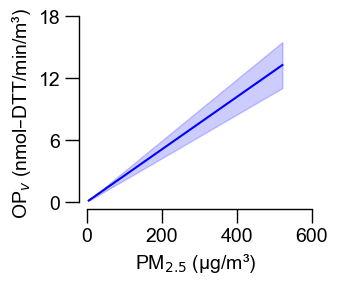

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file
data = pd.read_csv('MAresult.csv')

# Extract relevant columns
x = data['PM2.5'].values
y = data['OP'].values
y_lower = data['OP_lower'].values
y_upper = data['OP_upper'].values

# Plotting the dose-response relationship with confidence intervals
plt.figure(figsize=(3, 2.5))

# Plot the dose-response line
plt.plot(x, y, color='blue')

# Fill between the confidence intervals
plt.fill_between(x, y_lower, y_upper, color='blue', alpha=0.2)

# Adding labels and title
plt.xlabel(r'PM$_{2.5}$ (µg/m³)')
plt.ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)')  # (nmol– DTT/min/m³)')

# Customize plot to remove top and right frame and separate x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting limits to prevent axes from crossing
ax.spines['left'].set_bounds(0, 18)
ax.spines['bottom'].set_bounds(0, 600)

# Adjusting the ticks to make sure 500 is included
ax.set_xticks([0, 200, 400, 600])
ax.set_yticks([0, 6, 12, 18])

# Show the plot
plt.savefig('PM25CRF.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

### Loading & Describing Data

In [4]:
df = pd.read_csv('data3.csv')
df.head()

,Country/Region,IND,ENE,AGS+RCO,RCO,TRO,OPDTTv
0,Global,8.8404,4.2534,16.5549,11.3841,3.1692,1.0425
1,Global,5.8680,4.8900,11.4100,6.8460,2.6080,0.8150
2,India,12.3338,5.6468,21.8442,17.7577,2.8977,1.8575
3,Canada,0.7810,0.4015,1.4025,0.8305,0.8745,0.1375
4,Canada,0.9514,0.5183,1.6259,0.9514,1.0153,0.1775


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  596 non-null    object 
 1   IND             596 non-null    float64
 2   ENE             596 non-null    float64
 3   AGS+RCO         596 non-null    float64
 4   RCO             596 non-null    float64
 5   TRO             596 non-null    float64
 6   OPDTTv          596 non-null    float64
dtypes: float64(6), object(1)
memory usage: 32.7+ KB


In [6]:
Summary_table = df.describe()
Summary_table.to_csv('Summary_table.csv')
Summary_table

,IND,ENE,AGS+RCO,RCO,TRO,OPDTTv
count,596.000000,596.000000,596.000000,596.000000,596.000000,596.000000
mean,5.658320,7.017185,6.061249,5.316438,9.023933,1.390699
std,12.137624,11.868096,11.768260,9.769410,11.424665,1.377092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.013639
25%,0.000000,0.000000,0.000000,0.000000,1.500000,0.286943
50%,0.111750,0.456003,1.282948,1.266447,4.565959,0.900000
75%,6.112200,9.971063,6.268350,6.117000,12.512500,2.184960
max,111.452000,75.990000,99.553150,67.710000,102.076000,8.450000


### Data Processing for Visualization

#### General Data Visualization/ Trends

### Data Processing & visualization for Machine Learning

In [7]:
# Split the dataframe into X (independent variables) and y (dependent variable)
X = df[['IND','ENE','AGS+RCO','TRO']]
y = df['OPDTTv']

In [8]:
y

0      1.042500
1      0.815000
2      1.857500
3      0.137500
4      0.177500
         ...   
591    0.322750
592    0.554000
593    0.130714
594    0.230000
595    0.229722
Name: OPDTTv, Length: 596, dtype: float64

plt.rcParams.keys()

plt.rcParams['pdf.fonttype']=42

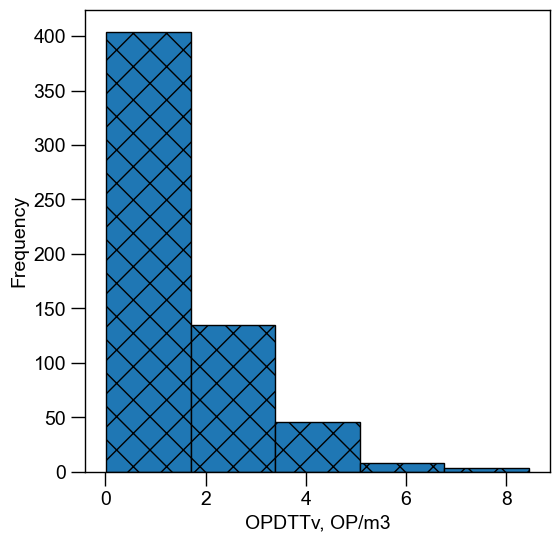

In [9]:
# Visualize distribution of y
fig, ax = plt.subplots(figsize=(6,6))
ax.hist(y, bins=5, edgecolor='black', hatch='\/') # you can adjust the number of bins to your liking
ax.set_xlabel('OPDTTv, OP/m3')
ax.set_ylabel('Frequency')
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


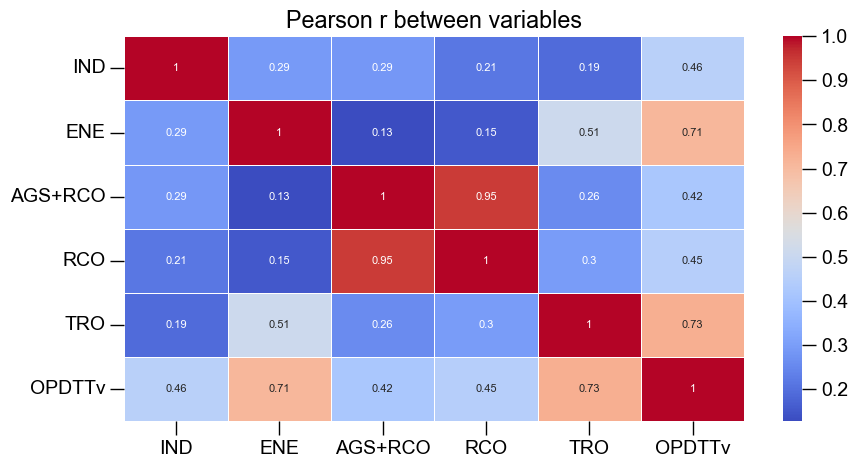

In [10]:
# Create correlation matrix
corr = df.corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True,  ax=ax, linewidths=0.5, annot_kws={"fontsize": 8})
ax.tick_params(labelsize=14)
ax.tick_params(axis='both', which='major', length=10)
plt.title('Pearson r between variables')
plt.savefig('pearson R_conc.png', bbox_inches='tight', dpi=1200)
plt.show()

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


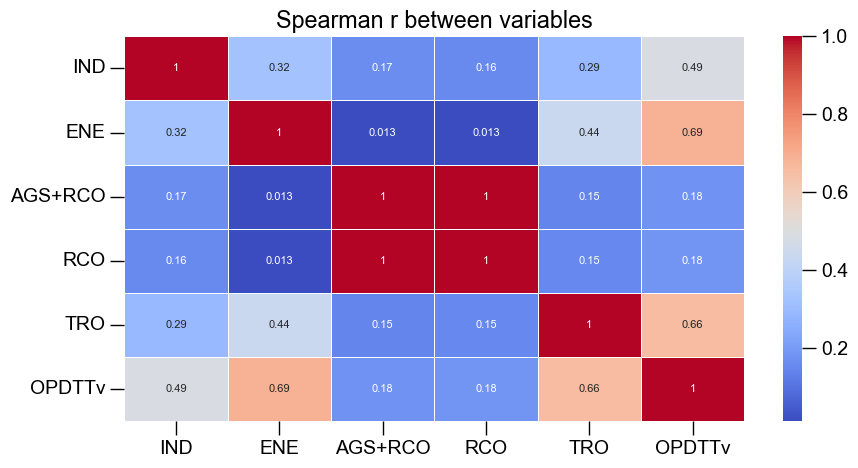

In [11]:
# Create correlation matrix using Spearman method
corr = df.corr(method='spearman')

# Create heatmap
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corr, cmap='coolwarm', annot=True,  ax=ax, linewidths=0.5, annot_kws={"fontsize": 8})
ax.tick_params(labelsize=14)
ax.tick_params(axis='both', which='major', length=10)
plt.title('Spearman r between variables')
plt.savefig('spearman R_conc.png', bbox_inches='tight', dpi=1200)
plt.show()

# Model trainig and evaluation

## Multiple models

In [12]:
import xgboost as xgb
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store results
models = ['Linear Regression', 'Ridge', 'Lasso', 'KNN', 'SVR', 'Decision Tree', 'Random Forest', 'Extra Trees', 'Bagging', 'AdaBoost', 'GradientBoost', 'XGBoost', 'MLP']

training_r2 = []
test_r2 = []
training_mae = []
test_mae = []
training_rmse = []
test_rmse = []

# Models
regressors = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    KNeighborsRegressor(),
    SVR(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    ExtraTreesRegressor(),
    BaggingRegressor(),
    AdaBoostRegressor(),
    GradientBoostingRegressor(),
    xgb.XGBRegressor(),
    MLPRegressor(random_state=42)
]

for regressor in regressors:
    regressor.fit(X_train, y_train)
    y_pred_train = regressor.predict(X_train)
    y_pred_test = regressor.predict(X_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
    rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

    training_r2.append(r2_train)
    test_r2.append(r2_test)
    training_mae.append(mae_train)
    test_mae.append(mae_test)
    training_rmse.append(rmse_train)
    test_rmse.append(rmse_test)

# Create DataFrame
results_df = pd.DataFrame({
    'Model': models,
    'Training R2': training_r2,
    'Test R2': test_r2,
    'Training MAE': training_mae,
    'Test MAE': test_mae,
    'Training RMSE': training_rmse,
    'Test RMSE': test_rmse
})

# Print and save DataFrame
print(results_df)
#results_df.to_csv('model_performance.csv', index=False)

                Model  Training R2   Test R2  Training MAE  Test MAE  \
0   Linear Regression     0.772937  0.807720      0.425423  0.422178   
1               Ridge     0.772937  0.807721      0.425425  0.422179   
2               Lasso     0.763831  0.808382      0.452107  0.442218   
3                 KNN     0.837649  0.763794      0.327748  0.432815   
4                 SVR     0.817307  0.765358      0.311048  0.403094   
5       Decision Tree     0.994595  0.632473      0.007895  0.527870   
6       Random Forest     0.961811  0.816377      0.154485  0.389014   
7         Extra Trees     0.994595  0.800912      0.007895  0.396033   
8             Bagging     0.957427  0.790724      0.156263  0.409319   
9            AdaBoost     0.653706  0.665527      0.736923  0.696480   
10      GradientBoost     0.940920  0.844057      0.221777  0.384115   
11            XGBoost     0.994318  0.807086      0.022912  0.401411   
12                MLP     0.851018  0.791975      0.335101  0.42

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Define the random forest regressor
seed = 42
np.random.seed(seed)
rf = RandomForestRegressor(random_state=seed, max_features=4)

# Define a grid of hyperparameters to search over
param_grid = {'n_estimators': [40, 50, 70, 100],
              'max_depth': [1, 2, 3, 5, 10],
              'min_samples_split': [3, 5, 7],
              'min_samples_leaf': [1, 2, 4]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

rf_best = best_estimator

# Evaluate the best estimator on the test set
y_pred = best_estimator.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2:", r2)
print("MAE:", mae)

R2: 0.8272875589627793
MAE: 0.38149633305894004


In [14]:
rf_best.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': 4,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## XGB

### training/ evaluation with stdev

In [15]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the XGBoost regressor
seed = 42
np.random.seed(seed)
xgbr = GradientBoostingRegressor(random_state=seed)

# Define a grid of hyperparameters to search over
param_grid = {'n_estimators': [100, 200,300, 500],
              'max_depth': [3, 5, 7, 11],
              'learning_rate': [0.1, 0.05, 0.01]}

# Use grid search to find the best hyperparameters
grid_search = GridSearchCV(xgbr, param_grid, cv=5)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

xgb_best = best_estimator

# Evaluate the best estimator on the training set
y_pred_train = best_estimator.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))

# Evaluate the best estimator on the test set
y_pred_test = best_estimator.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# Calculate standard deviation for R2, MAE, and RMSE for training and test sets
r2_train_std = np.std([r2_score(y_train, best_estimator.predict(X_train)) for _ in range(10)])
mae_train_std = np.std([mean_absolute_error(y_train, best_estimator.predict(X_train)) for _ in range(10)])
rmse_train_std = np.std([np.sqrt(mean_squared_error(y_train, best_estimator.predict(X_train))) for _ in range(10)])
r2_test_std = np.std([r2_score(y_test, best_estimator.predict(X_test)) for _ in range(10)])
mae_test_std = np.std([mean_absolute_error(y_test, best_estimator.predict(X_test)) for _ in range(10)])
rmse_test_std = np.std([np.sqrt(mean_squared_error(y_test, best_estimator.predict(X_test))) for _ in range(10)])

# Print the results
print("Training Set:")
print("R2:", r2_train, "+/-", r2_train_std)
print("MAE:", mae_train, "+/-", mae_train_std)
print("RMSE:", rmse_train, "+/-", rmse_train_std)
print("\nTest Set:")
print("R2:", r2_test, "+/-", r2_test_std)
print("MAE:", mae_test, "+/-", mae_test_std)
print("RMSE:", rmse_test, "+/-", rmse_test_std)

Training Set:
R2: 0.9019414573432274 +/- 0.0
MAE: 0.2693559918038716 +/- 0.0
RMSE: 0.40755928260700125 +/- 0.0

Test Set:
R2: 0.8247247820938002 +/- 0.0
MAE: 0.4034195548315599 +/- 0.0
RMSE: 0.6540881463077345 +/- 0.0


In [16]:
xgb_best.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

# SHAP analysis

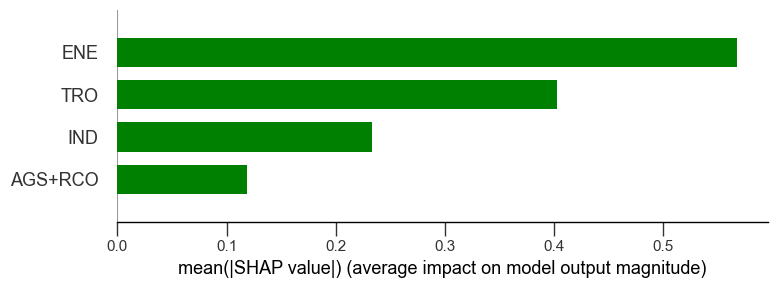

In [17]:
# Train RandomForest model
model = rf_best.fit(X, y)

# Calculate SHAP values
#explainer = shap.TreeExplainer(model, X)
explainer = shap.TreeExplainer(model)
#shap_values = explainer(X)
shap_values = explainer.shap_values(X)

# Create summary plot



shap.summary_plot(shap_values, X, plot_type='bar', feature_names=X.columns,color="g", show=False)


#plt.savefig('SHAP summary2.png', bbox_inches='tight', dpi=1200)

# Train XGBoost model
model = xgb_best.fit(X, y)

# Calculate SHAP values
#explainer = shap.TreeExplainer(model, X)
explainer = shap.TreeExplainer(model)
#shap_values = explainer(X)
shap_values = explainer.shap_values(X)

# Create summary plot



shap.summary_plot(shap_values, X, plot_type='bar', feature_names=X.columns,color="g", show=False)


#plt.savefig('SHAP summary2.png', bbox_inches='tight', dpi=1200)

In [18]:
shap_values

array([[ 0.18023706, -0.28280704,  0.20763553, -0.4193549 ],
       [ 0.09917763, -0.27380752,  0.13745893, -0.45610203],
       [ 0.64303991, -0.20490074,  0.17627742, -0.35898425],
       ...,
       [-0.22915077, -0.53895314, -0.09808903, -0.39370164],
       [-0.19105095, -0.51954514,  0.01748316, -0.37482789],
       [-0.19277385, -0.51150847, -0.07194034, -0.41001268]])

# Create beeswarm plot
shap.plots.beeswarm(shap_values, show=False)
#plt.savefig('SHAP beeswarm.png', bbox_inches='tight', dpi=1200)

shap.plots.bar(shap_values)

shap.plots.scatter(shap_values[:,"K"], color=shap_values[:,"Temp"], show=False)
plt.savefig('K_Temp.png', bbox_inches='tight', dpi=1200)

In [19]:
shap_df = pd.DataFrame(shap_values, columns=X.columns)
shap_df.to_csv('SHAP_values_0.csv')
shap_df

,IND,ENE,AGS+RCO,TRO
0,0.180237,-0.282807,0.207636,-0.419355
1,0.099178,-0.273808,0.137459,-0.456102
2,0.643040,-0.204901,0.176277,-0.358984
3,-0.181105,-0.497782,-0.079383,-0.393651
4,-0.165078,-0.497164,-0.077903,-0.414316
...,...,...,...,...
591,-0.126412,-0.506856,-0.052639,-0.368889
592,-0.094547,-0.470445,-0.103472,-0.056150
593,-0.229151,-0.538953,-0.098089,-0.393702
594,-0.191051,-0.519545,0.017483,-0.374828


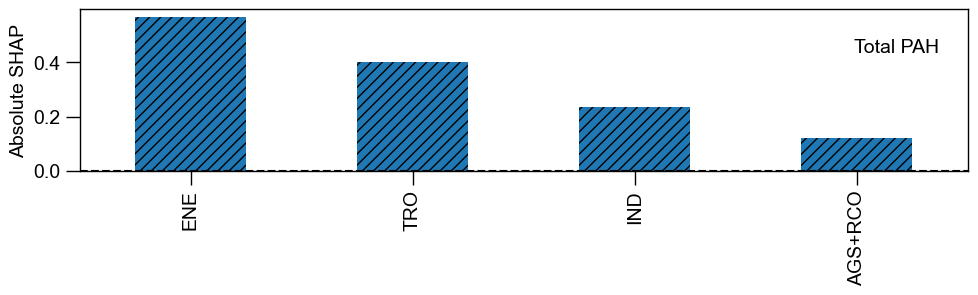

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# create a sample dataframe with SHAP values
df1 = shap_df

# create a figure with a 2*1 axis grid
fig, ax = plt.subplots(2, 1, figsize=(10, 5))

# plot the mean absolute SHAP values as a bar chart in the first axis
mean_abs_shap = np.abs(df1).mean()
mean_abs_shap_sorted = mean_abs_shap.sort_values(ascending=False)  # sort the values in descending order
mean_abs_shap_sorted.plot(kind='bar', ax=ax[0], hatch='///')  # plot the mean absolute SHAP values with hatching
ax[0].set_ylabel("Absolute SHAP")

# add a horizontal dashed line at y=0 for the first axis
ax[0].axhline(y=0, linestyle='--', color='black')

# set the y-axis in log scale for the first axis
# ax[0].set_yscale('log')

# remove the second axis
fig.delaxes(ax[1])

# Add text at the top right corner of the figure
text = 'Total PAH'
fig.text(0.95, 0.90, text, ha='right', va='top')

# adjust the layout of the figure
fig.tight_layout()

plt.savefig('SHAP summary_.png', bbox_inches='tight', dpi=1200)

# show the plot
plt.show()

In [21]:
global_intercept = y.mean()
global_intercept

1.3906989658791944

In [22]:
import pandas as pd

def transform_to_flit_shap(shap_df, global_intercept):
    # Step 2: Calculate average absolute values for each column
    importance = shap_df.abs().mean()

    # Step 3: Calculate total importance
    total_importance = importance.sum()

    # Step 4: Calculate local intercept for each column
    local_intercepts = (importance / total_importance) * global_intercept

    # Step 5: Add local intercepts to each column in shap_df
    flitshap_df = shap_df + local_intercepts

    # Set negative values to 0
    flitshap_df[flitshap_df < 0] = 0

    # Display FLIT-SHAP DataFrame
    print("FLIT-SHAP DataFrame:")
    print(flitshap_df)

    return flitshap_df

# Example usage:
# Assuming you have a SHAP values DataFrame called shap_df
# and a global intercept value called global_intercept
# flitshap_df = transform_to_flit_shap(shap_df, global_intercept)

In [23]:
flitshap_df = transform_to_flit_shap(shap_df=shap_df, global_intercept=global_intercept)

FLIT-SHAP DataFrame:
          IND       ENE   AGS+RCO       TRO
0    0.425579  0.313781  0.332897  0.004152
1    0.344520  0.322781  0.262720  0.000000
2    0.888382  0.391687  0.301539  0.064523
3    0.064237  0.098806  0.045878  0.029856
4    0.080264  0.099424  0.047358  0.009192
..        ...       ...       ...       ...
591  0.118931  0.089732  0.072623  0.054618
592  0.150795  0.126143  0.021790  0.367357
593  0.016192  0.057635  0.027172  0.029805
594  0.054291  0.077043  0.142745  0.048679
595  0.052569  0.085080  0.053321  0.013494

[596 rows x 4 columns]


In [24]:
flitshap_df = pd.DataFrame(flitshap_df, columns=flitshap_df.columns)
flitshap_df.to_csv('flitshap_values.csv')
flitshap_df

,IND,ENE,AGS+RCO,TRO
0,0.425579,0.313781,0.332897,0.004152
1,0.344520,0.322781,0.262720,0.000000
2,0.888382,0.391687,0.301539,0.064523
3,0.064237,0.098806,0.045878,0.029856
4,0.080264,0.099424,0.047358,0.009192
...,...,...,...,...
591,0.118931,0.089732,0.072623,0.054618
592,0.150795,0.126143,0.021790,0.367357
593,0.016192,0.057635,0.027172,0.029805
594,0.054291,0.077043,0.142745,0.048679


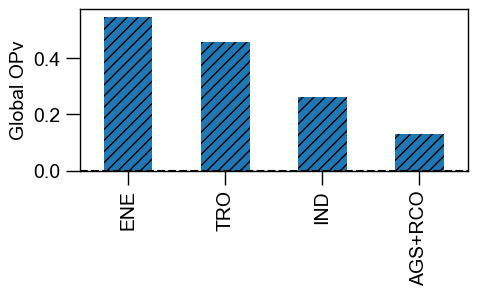

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# create a sample dataframe with SHAP values
df1 = flitshap_df

# create a figure with a 2*1 axis grid
fig, ax = plt.subplots(2, 1, figsize=(5, 5))

# plot the mean absolute SHAP values as a bar chart in the first axis
mean_abs_shap = np.abs(df1).mean()
mean_abs_shap_sorted = mean_abs_shap.sort_values(ascending=False)  # sort the values in descending order
mean_abs_shap_sorted.plot(kind='bar', ax=ax[0], hatch='///')  # plot the mean absolute SHAP values with hatching
ax[0].set_ylabel("Global OPv")

# add a horizontal dashed line at y=0 for the first axis
ax[0].axhline(y=0, linestyle='--', color='black')

# set the y-axis in log scale for the first axis
# ax[0].set_yscale('log')

# remove the second axis
fig.delaxes(ax[1])

# Add text at the top right corner of the figure
#text = 'Total PAH'
#fig.text(0.95, 0.90, text, ha='right', va='top')

# adjust the layout of the figure
fig.tight_layout()

plt.savefig('SHAP summary_.png', bbox_inches='tight', dpi=1200)

# show the plot
plt.show()

# FLIT-SHAP without eliminating negatives

def xtransform_to_flit_shap(shap_df, global_intercept):
    # Step 2: Calculate average absolute values for each column
    importance = shap_df.abs().mean()

    # Step 3: Calculate total importance
    total_importance = importance.sum()

    # Step 4: Calculate local intercept for each column
    local_intercepts = (importance / total_importance) * global_intercept

    # Step 5: Add local intercepts to each column in shap_df
    xflitshap_df = shap_df + local_intercepts

    # Set negative values to 0
    #flitshap_df[flitshap_df < 0] = 0

    # Display FLIT-SHAP DataFrame
    print("FLIT-SHAP DataFrame:")
    print(xflitshap_df)

    return xflitshap_df

# Example usage:
# Assuming you have a SHAP values DataFrame called shap_df
# and a global intercept value called global_intercept
# flitshap_df = transform_to_flit_shap(shap_df, global_intercept)

xflitshap_df = xtransform_to_flit_shap(shap_df=shap_df, global_intercept=global_intercept)
xflitshap_df = pd.DataFrame(xflitshap_df, columns=xflitshap_df.columns)
xflitshap_df.to_csv('xflitshap_values_0.csv')
xflitshap_df

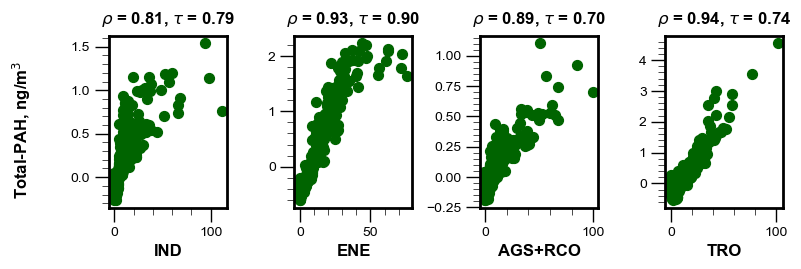

In [26]:
# Import the scipy.stats module
from scipy.stats import pearsonr, spearmanr
import matplotlib.ticker as ticker  # Import the ticker module for minor ticks

# Set up the subplot grid
num_cols = min(len(X.columns), 5)  # Limit the number of columns to 27 or the actual number of columns
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over the columns of your original data
for i, col in enumerate(X.columns[:num_cols]):
    # Get the corresponding SHAP values from your SHAP dataframe
    shap_col = shap_df[col]
    
    # Create a scatter plot with the original data on the x-axis and SHAP values on the y-axis
    axs[i].scatter(X[col], shap_col, color='darkgreen', s=50)  # Reduced marker size
    
    # Set the axis labels
    axs[i].set_xlabel(col, fontsize=12, fontweight='bold')  # Make the x-axis label bold
    
    # Calculate the Pearson and Spearman correlation coefficients and p-values
    pearson_r, pearson_p = pearsonr(X[col], shap_col)
    spearman_r, spearman_p = spearmanr(X[col], shap_col)
    
    # Display the correlation values on the subplot
    # Use a larger font size and adjust the position and alignment as needed
    # Use the LaTeX syntax to display the symbols
    # Use the r'$...$' format to render the symbols correctly
    # Display only the correlation values in one row
    axs[i].text(0.5, 1.15, r'$\rho$ = ' + f"{pearson_r:.2f}, " + r'$\tau$ = ' + f"{spearman_r:.2f}", 
                transform=axs[i].transAxes, fontsize=12, fontweight='bold', 
                horizontalalignment='center', verticalalignment='top') # Use the \rho symbol for Pearson correlation and the \tau symbol for Spearman correlation
    
    # Set both major and minor ticks with reduced fontsize
    axs[i].tick_params(axis='both', which='both', labelsize=10)
    axs[i].xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(ticker.AutoMinorLocator())

    # Increase the frame thickness
    for axis in ['top', 'bottom', 'left', 'right']:
        axs[i].spines[axis].set_linewidth(2)



# Remove any empty subplots
for j in range(num_cols, len(axs)):
    fig.delaxes(axs[j])
    
# Set a general y-axis label
fig.supylabel('Total-PAH, ng/m$^3$', fontsize=12, fontweight='bold')

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('OP dependence.png', bbox_inches='tight', dpi=1200)

# Show the plot
plt.show()

## FLITSHAP PLOT AND SLOPE

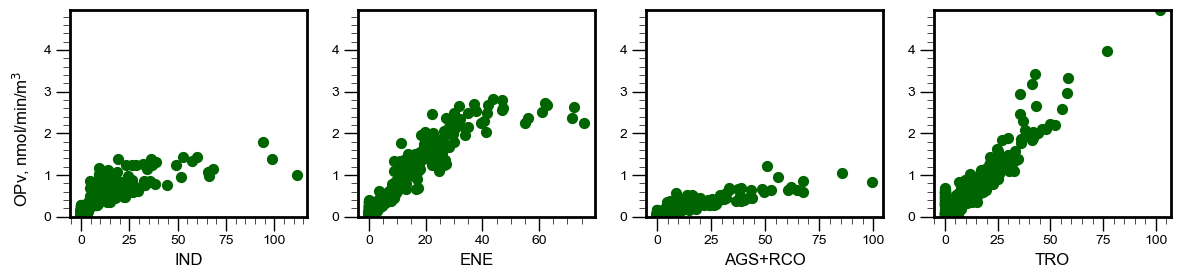

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import matplotlib.ticker as ticker  # Import the ticker module for minor ticks

# Function to calculate linear regression slope
def calculate_slope(x, y):
    slope, _ = np.polyfit(x, y, 1)
    return slope

# Create an empty DataFrame to store the slopes
slopes_df = pd.DataFrame(columns=['Feature', 'Slope'])

# Determine the global min and max y-values for setting a common y-axis range
y_min = flitshap_df.values.min()
y_max = flitshap_df.values.max()

# Set up the subplot grid
num_cols = min(len(X.columns), 27)  # Limit the number of columns to 27 or the actual number of columns
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))  # Adjusted figure size for better spacing

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over the columns of your original data
for i, col in enumerate(X.columns[:num_cols]):
    # Get the corresponding SHAP values from your SHAP dataframe
    shap_col = flitshap_df[col]
    
    # Create a scatter plot with the original data on the x-axis and SHAP values on the y-axis
    axs[i].scatter(X[col], shap_col, color='darkgreen', s=50)  # Reduced marker size
    
    # Set the axis labels
    axs[i].set_xlabel(col, fontsize=12)  # Make the x-axis label bold
    
    # Set both major and minor ticks with reduced fontsize
    axs[i].tick_params(axis='both', which='both', labelsize=10)
    axs[i].xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(ticker.AutoMinorLocator())
    
    # Set the y-axis limits to the global min and max
    axs[i].set_ylim(0, y_max)
    
    # Increase the frame thickness
    for axis in ['top', 'bottom', 'left', 'right']:
        axs[i].spines[axis].set_linewidth(2)

# Remove any empty subplots
for j in range(num_cols, len(axs)):
    fig.delaxes(axs[j])
    
# Set a general y-axis label
fig.supylabel('OPv, nmol/min/m$^3$', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('FLIT-SHAP_PAH_metal_dependence.png', bbox_inches='tight', dpi=1200)

# Show the plot
plt.show()

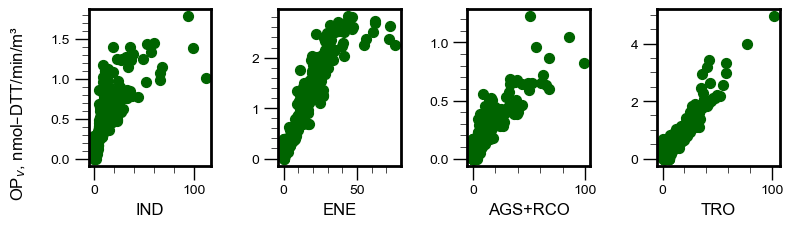

In [28]:
# Import the scipy.stats module
from scipy.stats import pearsonr, spearmanr
import matplotlib.ticker as ticker  # Import the ticker module for minor ticks

# Function to calculate linear regression slope
def calculate_slope(x, y):
    slope, _ = np.polyfit(x, y, 1)
    return slope

# Create an empty DataFrame to store the slopes
slopes_df = pd.DataFrame(columns=['Feature', 'Slope'])

# Set up the subplot grid
num_cols = min(len(X.columns), 27)  # Limit the number of columns to 27 or the actual number of columns
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 2.5))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Iterate over the columns of your original data
for i, col in enumerate(X.columns[:num_cols]):
    # Get the corresponding SHAP values from your SHAP dataframe
    shap_col = flitshap_df[col]
    
    # Create a scatter plot with the original data on the x-axis and SHAP values on the y-axis
    axs[i].scatter(X[col], shap_col, color='darkgreen', s=50)  # Reduced marker size
    
    # Set the axis labels
    axs[i].set_xlabel(col, fontsize=12)  # Make the x-axis label bold
    
    
    # Set both major and minor ticks with reduced fontsize
    axs[i].tick_params(axis='both', which='both', labelsize=10)
    axs[i].xaxis.set_minor_locator(ticker.AutoMinorLocator())
    axs[i].yaxis.set_minor_locator(ticker.AutoMinorLocator())

    # Increase the frame thickness
    for axis in ['top', 'bottom', 'left', 'right']:
        axs[i].spines[axis].set_linewidth(2)



# Remove any empty subplots
for j in range(num_cols, len(axs)):
    fig.delaxes(axs[j])
    
# Save the slopes to a CSV file
#slopes_df.to_csv('slope_flitshap.csv', index=False)
    
# Set a general y-axis label
fig.supylabel(r'OP$_{v}$, nmol–DTT/min/m³', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()
plt.savefig('FLIT-SHAP_PAH_metal_dependence.png', bbox_inches='tight', dpi=1200)

# Show the plot
plt.show()

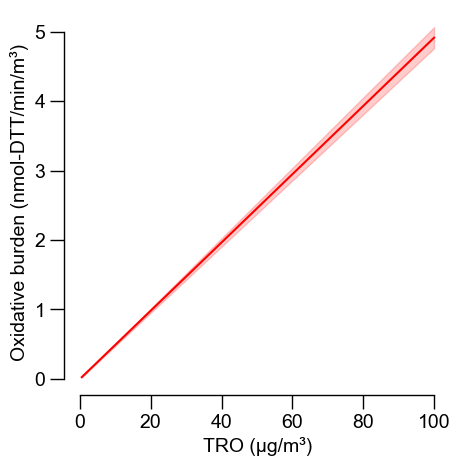

In [29]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Provided data
x = X["TRO"].values
y = flitshap_df["TRO"].values

# Fit the linear model without a constant term
model = sm.OLS(y, x).fit()

# Generate new nonzero x values for prediction
new_x = np.linspace(0.5, 100, 200)
new_x_df = pd.DataFrame(new_x, columns=["TRO"])

# Predict using the new x values
predictions = model.get_prediction(new_x_df)
summary_frame = predictions.summary_frame(alpha=0.01)  # 95% confidence interval

# Plotting the data and the fit
plt.figure(figsize=(5, 5))
#plt.scatter(x, y, label='Data', color='blue')
plt.plot(new_x, summary_frame['mean'], label='Fit', color='red')

# Plotting the confidence interval (shaded area)
plt.fill_between(new_x, summary_frame['mean_ci_lower'].values, summary_frame['mean_ci_upper'].values, color='red', alpha=0.2, label='95% CI')

# Customize plot to remove top and right frame and separate x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting limits to prevent axes from crossing
ax.spines['left'].set_bounds(0, 5)
ax.spines['bottom'].set_bounds(0, 100)

plt.xlabel('TRO (µg/m³)')
plt.ylabel('Oxidative burden (nmol-DTT/min/m³)')
plt.show()

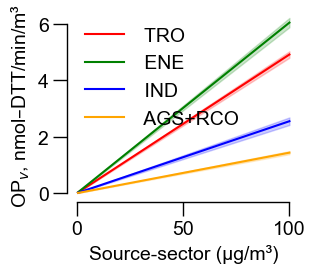

Summary for TRO:
                                 OLS Regression Results                                
Dep. Variable:                    TRO   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              7028.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                        0.00
Time:                        10:56:52   Log-Likelihood:                          90.075
No. Observations:                 596   AIC:                                     -178.2
Df Residuals:                     595   BIC:                                     -173.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [30]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Provided data
columns = ["TRO", "ENE", "IND", "AGS+RCO"]
x_data = X[columns]
y_data = flitshap_df[columns]

# Initialize the plot
plt.figure(figsize=(3, 2.5))

# Define colors for each plot
colors = ["red", "green", "blue", "orange"]

# Store model summaries
model_summaries = []

# Iterate through each column for analysis
for i, column in enumerate(columns):
    x = x_data[column]
    y = y_data[column]

    # Fit the linear model without a constant term
    model = sm.OLS(y, x).fit()

    # Store the model summary
    model_summaries.append((column, model.summary()))
    
    # Generate new nonzero x values for prediction
    new_x = np.linspace(0.5, 100, 200)
    new_x_df = pd.DataFrame(new_x, columns=[column])

    # Predict using the new x values
    predictions = model.get_prediction(new_x_df)
    summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence interval

    # Plot the data and the fit
    #plt.scatter(x, y, label=f'Data {column}', alpha=0.5, color=colors[i])
    plt.plot(new_x, summary_frame['mean'], label=f' {column}', color=colors[i])

    # Plotting the confidence interval (shaded area)
    plt.fill_between(new_x, summary_frame['mean_ci_lower'].values, summary_frame['mean_ci_upper'].values, color=colors[i], alpha=0.2)


# Customize plot to remove top and right frame and separate x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting limits to prevent axes from crossing
ax.spines['left'].set_bounds(0, 6)
ax.spines['bottom'].set_bounds(0, 100)

# Adjusting the ticks to make sure 500 is included
#ax.set_xticks([0, 25, 50, 75, 100])
ax.set_yticks([0, 2, 4, 6])

# Adding labels, legend, and title
plt.xlabel('Source-sector (µg/m³)')
plt.ylabel(r'OP$_{v}$, nmol–DTT/min/m³')
plt.legend(frameon=False)
plt.show()

# Print model summaries
for column, summary in model_summaries:
    print(f"Summary for {column}:")
    print(summary)
    print("\n" + "="*80 + "\n")

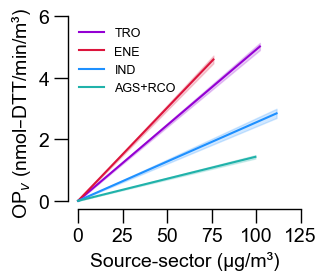

Summary for TRO:
                                 OLS Regression Results                                
Dep. Variable:                    TRO   R-squared (uncentered):                   0.922
Model:                            OLS   Adj. R-squared (uncentered):              0.922
Method:                 Least Squares   F-statistic:                              7028.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):                        0.00
Time:                        10:56:52   Log-Likelihood:                          90.075
No. Observations:                 596   AIC:                                     -178.2
Df Residuals:                     595   BIC:                                     -173.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [31]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Provided data
columns = ["TRO", "ENE", "IND", "AGS+RCO"]
x_data = X[columns]
y_data = flitshap_df[columns]

# Initialize the plot
plt.figure(figsize=(3, 2.5))

# Define colors for each plot
colors = ["darkviolet", "crimson", "dodgerblue", "lightseagreen"]

# Store model summaries
model_summaries = []

# Iterate through each column for analysis
for i, column in enumerate(columns):
    x = x_data[column]
    y = y_data[column]

    # Fit the linear model without a constant term
    model = sm.OLS(y, x).fit()

    # Store the model summary
    model_summaries.append((column, model.summary()))

    # Sort the values for plotting
    sorted_idx = np.argsort(x)
    x_sorted = x.iloc[sorted_idx]
    y_sorted = y.iloc[sorted_idx]
    
    # Predict using the new x values
    predictions = model.get_prediction(x_sorted)
    summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence interval

    # Plot the data and the fit
    plt.plot(x_sorted, summary_frame['mean'], label=f'{column}', color=colors[i])

    # Plotting the confidence interval (shaded area)
    plt.fill_between(x_sorted.values, summary_frame['mean_ci_lower'].values, summary_frame['mean_ci_upper'].values, color=colors[i], alpha=0.2)

# Customize plot to remove top and right frame and separate x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting limits to prevent axes from crossing
ax.spines['left'].set_bounds(0, 6)
ax.spines['bottom'].set_bounds(0, 125)

# Adjusting the ticks to make sure 500 is included
ax.set_xticks([0, 25, 50, 75, 100, 125])
ax.set_yticks([0, 2, 4, 6])

# Adding labels, legend, and title
plt.xlabel('Source-sector (µg/m³)')
plt.ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)') #(nmol-DTT/min/m³)')
#plt.legend(frameon=False)
plt.legend(frameon=False, fontsize=9)

plt.savefig('sourceCRF.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Print model summaries
for column, summary in model_summaries:
    print(f"Summary for {column}:")
    print(summary)
    print("\n" + "="*80 + "\n")

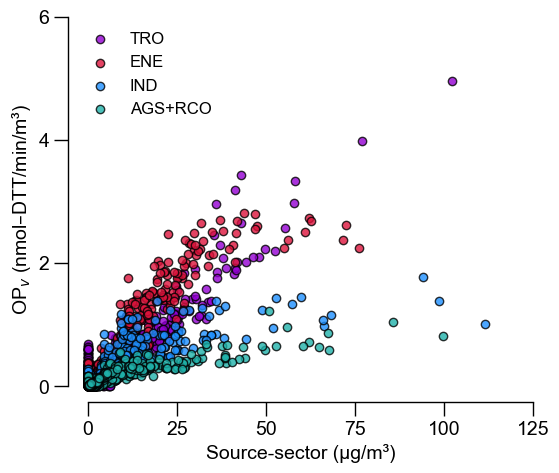

In [32]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Provided data
columns = ["TRO", "ENE", "IND", "AGS+RCO"]
x_data = X[columns]
y_data = flitshap_df[columns]

# Initialize the plot
plt.figure(figsize=(6, 5))

# Define colors for each plot
#colors = ["orange", "r", "blue", "g"]
colors = ["darkviolet", "crimson", "dodgerblue", "lightseagreen"]

# Store model summaries
model_summaries = []

# Iterate through each column for analysis
for i, column in enumerate(columns):
    x = x_data[column]
    y = y_data[column]

    # Fit the linear model without a constant term
    model = sm.OLS(y, x).fit()

    # Store the model summary
    model_summaries.append((column, model.summary()))

    # Sort the values for plotting
    sorted_idx = np.argsort(x)
    x_sorted = x.iloc[sorted_idx]
    y_sorted = y.iloc[sorted_idx]
    
    # Predict using the new x values
    predictions = model.get_prediction(x_sorted)
    summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence interval

    # Plot the data and the fit
    #plt.plot(x_sorted, summary_frame['mean'], label=f'{column}', color=colors[i])

    # Plotting the confidence interval (shaded area)
    #plt.fill_between(x_sorted.values, summary_frame['mean_ci_lower'].values, summary_frame['mean_ci_upper'].values, color=colors[i], alpha=0.2)

    # Add scatter plot for the raw data points
    plt.scatter(x, y, color=colors[i], alpha=0.8, edgecolor='black', label=f'{column}')

# Customize plot to remove top and right frame and separate x and y axes
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjusting limits to prevent axes from crossing
ax.spines['left'].set_bounds(0, 6)
ax.spines['bottom'].set_bounds(0, 125)

# Adjusting the ticks to make sure 500 is included
ax.set_xticks([0, 25, 50, 75, 100, 125])
ax.set_yticks([0, 2, 4, 6])

# Adding labels, legend, and title
plt.xlabel('Source-sector (µg/m³)')
plt.ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)')  # (nmol-DTT/min/m³)
plt.legend(frameon=False, fontsize=12)

plt.savefig('sourceCRF_scatter.tif', bbox_inches='tight', dpi=1200, transparent=True)

plt.show()

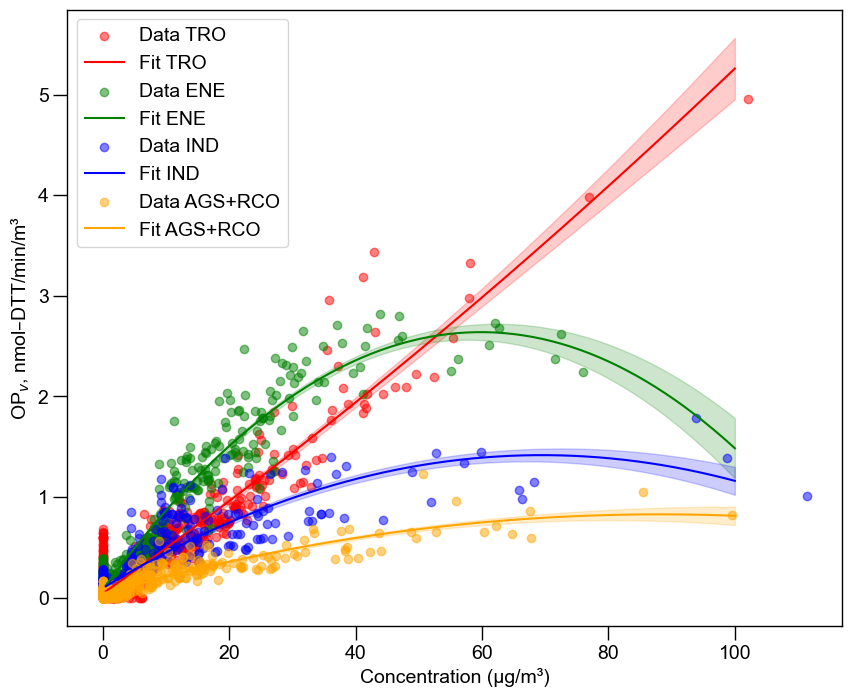

Summary for TRO:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     2120.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          6.77e-271
Time:                        10:56:54   Log-Likelihood:                 97.035
No. Observations:                 596   AIC:                            -188.1
Df Residuals:                     593   BIC:                            -174.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0413      0.012   

In [33]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Provided data
columns = ["TRO", "ENE", "IND", "AGS+RCO"]
x_data = X[columns]
y_data = flitshap_df[columns]

# Initialize the plot
plt.figure(figsize=(10, 8))

# Define colors for each plot
colors = ["red", "green", "blue", "orange"]

# Store model summaries
model_summaries = []

# Iterate through each column for analysis
for i, column in enumerate(columns):
    data = pd.DataFrame({'x': x_data[column], 'y': y_data[column]})

    # Fit the quadratic model using smf.ols
    model = smf.ols(formula='y ~ x + I(x**2)', data=data).fit()

    # Store the model summary
    model_summaries.append((column, model.summary()))

    # Generate new nonzero x values for prediction
    new_x = np.linspace(0.5, 100, 200)
    new_data = pd.DataFrame({'x': new_x})

    # Predict using the new x values
    predictions = model.get_prediction(new_data)
    summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence interval

    # Plot the data and the fit
    plt.scatter(data['x'], data['y'], label=f'Data {column}', alpha=0.5, color=colors[i])
    plt.plot(new_x, summary_frame['mean'], label=f'Fit {column}', color=colors[i])

    # Plotting the confidence interval (shaded area)
    plt.fill_between(new_x, summary_frame['mean_ci_lower'].values, summary_frame['mean_ci_upper'].values, color=colors[i], alpha=0.2)

# Adding labels, legend, and title
plt.xlabel('Concentration (µg/m³)')
plt.ylabel(r'OP$_{v}$, nmol–DTT/min/m³')
plt.legend()
plt.show()

# Print model summaries
for column, summary in model_summaries:
    print(f"Summary for {column}:")
    print(summary)
    print("\n" + "="*80 + "\n")

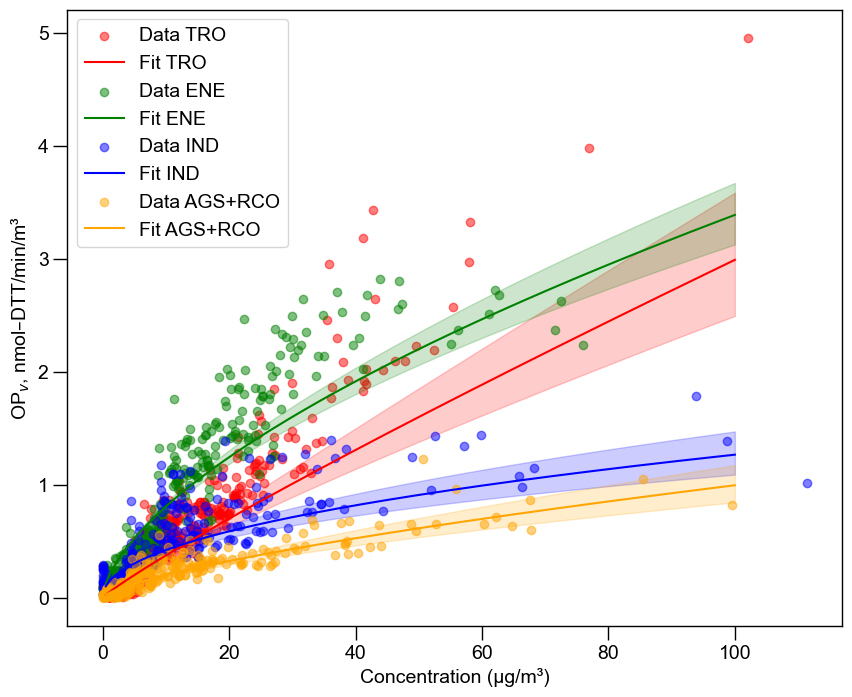

Summary for TRO:
                            OLS Regression Results                            
Dep. Variable:              np.log(y)   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     1034.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          1.95e-126
Time:                        10:56:54   Log-Likelihood:                -676.60
No. Observations:                 530   AIC:                             1357.
Df Residuals:                     528   BIC:                             1366.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0629      0.059   

In [34]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Provided data
columns = ["TRO", "ENE", "IND", "AGS+RCO"]
x_data = X[columns]
y_data = flitshap_df[columns]

# Initialize the plot
plt.figure(figsize=(10, 8))

# Define colors for each plot
colors = ["red", "green", "blue", "orange"]

# Store model summaries
model_summaries = []

# Iterate through each column for analysis
for i, column in enumerate(columns):
    data = pd.DataFrame({'x': x_data[column], 'y': y_data[column]})

    # Filter out zero or negative values for log transformation
    data = data[(data['x'] > 0) & (data['y'] > 0)]

    # Fit the power function model using smf.ols
    model = smf.ols(formula='np.log(y) ~ np.log(x)', data=data).fit()

    # Store the model summary
    model_summaries.append((column, model.summary()))

    # Generate new nonzero x values for prediction
    new_x = np.linspace(0.5, 100, 200)
    new_data = pd.DataFrame({'x': new_x})

    # Predict using the new x values
    predictions = model.get_prediction(new_data)
    summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence interval

    # Convert log predictions back to original scale
    y_pred = np.exp(summary_frame['mean'])
    y_ci_lower = np.exp(summary_frame['mean_ci_lower'])
    y_ci_upper = np.exp(summary_frame['mean_ci_upper'])

    # Plot the data and the fit
    plt.scatter(data['x'], data['y'], label=f'Data {column}', alpha=0.5, color=colors[i])
    plt.plot(new_x, y_pred, label=f'Fit {column}', color=colors[i])

    # Plotting the confidence interval (shaded area)
    plt.fill_between(new_x, y_ci_lower.values, y_ci_upper.values, color=colors[i], alpha=0.2)

# Adding labels, legend, and title
plt.xlabel('Concentration (µg/m³)')
plt.ylabel(r'OP$_{v}$, nmol–DTT/min/m³')
plt.legend()
plt.show()

# Print model summaries
for column, summary in model_summaries:
    print(f"Summary for {column}:")
    print(summary)
    print("\n" + "="*80 + "\n")

!pip install patsy

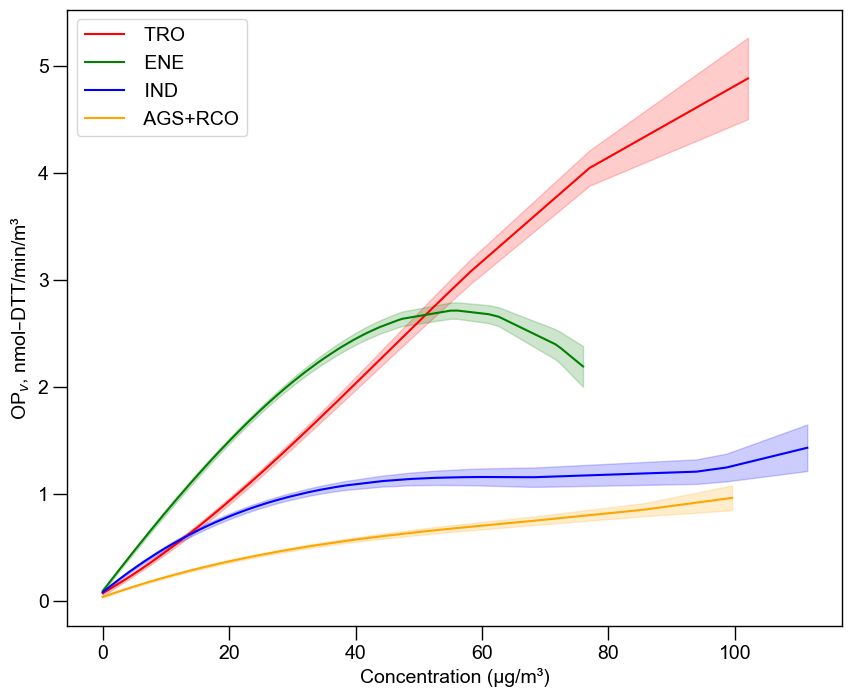

Summary for TRO:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 08 Jan 2025   Prob (F-statistic):          7.24e-274
Time:                        10:56:55   Log-Likelihood:                 107.90
No. Observations:                 596   AIC:                            -207.8
Df Residuals:                     592   BIC:                            -190.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.

In [35]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import patsy

# Provided data
columns = ["TRO", "ENE", "IND", "AGS+RCO"]
x_data = X[columns]
y_data = flitshap_df[columns]

# Initialize the plot
plt.figure(figsize=(10, 8))

# Define colors for each plot
colors = ["red", "green", "blue", "orange"]

# Store model summaries
model_summaries = []

# Iterate through each column for analysis
for i, column in enumerate(columns):
    data = pd.DataFrame({'x': x_data[column], 'y': y_data[column]})

    # Create the spline basis for the original data
    transformed_x = patsy.dmatrix("bs(x, df=3, degree=3) - 1", data, return_type='dataframe')

    # Fit the spline model
    model = smf.ols(formula='y ~ transformed_x', data=data).fit()

    # Store the model summary
    model_summaries.append((column, model.summary()))

    # Predict using the original x values
    new_transformed_x = patsy.dmatrix("bs(x, df=3, degree=3) - 1", data, return_type='dataframe')
    predictions = model.get_prediction(new_transformed_x)
    summary_frame = predictions.summary_frame(alpha=0.05)  # 95% confidence interval

    # Sort the values for plotting
    sorted_idx = np.argsort(data['x'])
    x_sorted = data['x'].iloc[sorted_idx]
    mean_sorted = summary_frame['mean'].iloc[sorted_idx]
    ci_lower_sorted = summary_frame['mean_ci_lower'].iloc[sorted_idx]
    ci_upper_sorted = summary_frame['mean_ci_upper'].iloc[sorted_idx]

    # Plot the data and the fit
    #plt.scatter(data['x'], data['y'], label=f'Data {column}', alpha=0.5, color=colors[i])
    plt.plot(x_sorted, mean_sorted, label=f' {column}', color=colors[i])

    # Plotting the confidence interval (shaded area)
    plt.fill_between(x_sorted.values, ci_lower_sorted.values, ci_upper_sorted.values, color=colors[i], alpha=0.2)

# Adding labels, legend, and title
plt.xlabel('Concentration (µg/m³)')
plt.ylabel(r'OP$_{v}$, nmol–DTT/min/m³')
plt.legend()
plt.show()

# Print model summaries
for column, summary in model_summaries:
    print(f"Summary for {column}:")
    print(summary)
    print("\n" + "="*80 + "\n")

In [36]:
# Extract the 'Country/Region' column from df
country_region = df['Country/Region']

# Insert the 'Country/Region' column as the first column in flitshap_df
flitshap_df.insert(0, 'Country/Region', country_region)

# Sort the updated flitshap_df by the 'Country/Region' column
sorted_flitshap_df = flitshap_df.sort_values(by='Country/Region').reset_index(drop=True)

# Display the sorted DataFrame
sorted_flitshap_df

,Country/Region,IND,ENE,AGS+RCO,TRO
0,Australia,0.043523,0.115241,0.000000,0.340916
1,Australia,0.039900,0.057722,0.030366,0.025313
2,Australia,0.093997,0.080259,0.054683,0.014187
3,Bangladesh,1.443717,0.202909,0.648890,1.066351
4,Bangladesh,1.233821,0.253379,0.002043,0.574757
...,...,...,...,...,...
591,United States,0.040378,0.058039,0.049395,0.033658
592,United States,0.042091,0.062893,0.046896,0.032420
593,United States,0.041965,0.064635,0.051937,0.038576
594,United States,0.061479,0.113613,0.051703,0.042522


In [37]:
# Calculate the average for each Country/Region
grouped_df = sorted_flitshap_df.groupby('Country/Region').mean()

# Calculate the global average (World)
world_average = grouped_df.mean().to_frame().T
world_average.index = ['Average']

# Append the "World" row to grouped_df
grouped_df = pd.concat([grouped_df, world_average])

# Calculate the total (sum of the Country/Region average)
grouped_df['Total'] = grouped_df.sum(axis=1)

# Calculate the percentage contribution of each column to the total
percentage_contribution = grouped_df.div(grouped_df['Total'], axis=0) * 100

# Exclude the "Total" column from the final DataFrame
percentage_contribution = percentage_contribution.drop(columns='Total')

# Display the results
print("Average values by Country/Region:")
print(grouped_df)
print("\nPercentage contribution of each column to the total:")
print(percentage_contribution)

Average values by Country/Region:
                          IND       ENE   AGS+RCO       TRO     Total
Australia            0.059140  0.084407  0.028350  0.126805  0.298703
Bangladesh           1.142463  0.230491  0.264563  0.476770  2.114286
Brazil               0.236739  0.095904  0.039304  0.318219  0.690165
Canada               0.104731  0.089735  0.035868  0.061688  0.292022
Central Asia         0.419999  0.475137  0.108358  0.000000  1.003493
Chile                0.326253  0.187336  0.345876  0.340020  1.199485
China                0.421179  1.038237  0.171375  0.752192  2.382983
Croatia              0.415654  0.181672  0.183469  0.195957  0.976753
Cyprus               0.054288  0.086970  0.083029  0.123262  0.347549
Czechia              0.161299  0.717645  0.141851  0.198056  1.218850
DR Congo             0.131094  0.168978  0.225259  0.064954  0.590285
East Asia            0.122810  0.360528  0.257483  0.160145  0.900967
Egypt                0.342606  0.703073  0.301257  0.089

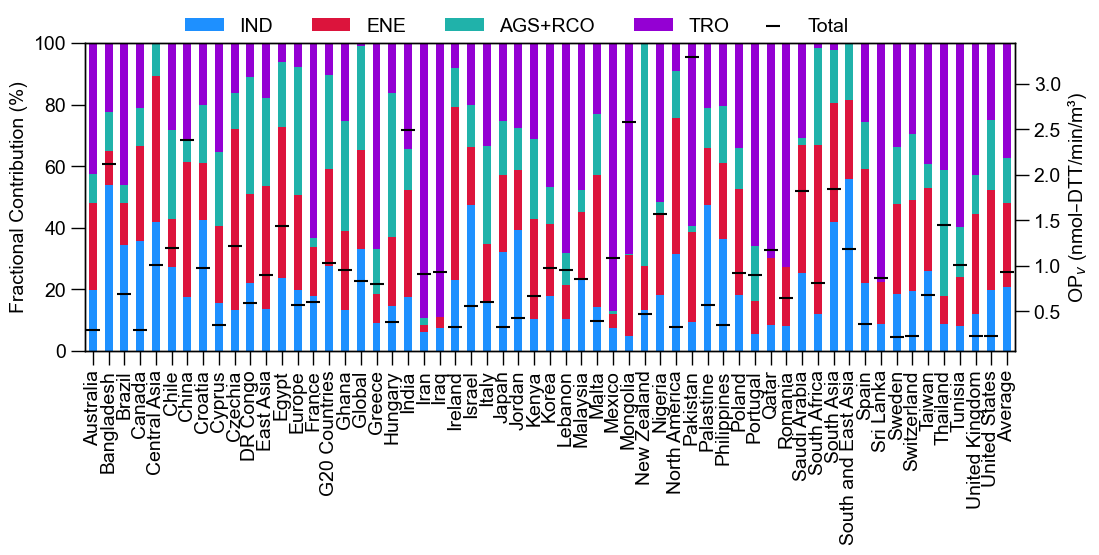

In [38]:
import matplotlib.pyplot as plt

# Define the colors
#colors = ["darkviolet", "firebrick", "dodgerblue", "teal"]
colors = ['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet']

# Plotting the 100% stacked bar chart
ax = percentage_contribution.plot(kind='bar', stacked=True, figsize=(12, 4), color=colors)

# Adding labels and title for primary y-axis
ax.set_ylabel('Fractional Contribution (%)')
ax.set_ylim(0, 100)  # Set y-axis limits to remove space above 100%
ax.set_xticks(range(len(percentage_contribution.index)))
ax.set_xticklabels(percentage_contribution.index, rotation=90)

# Customizing the legend
bars_legend = ax.legend(loc='upper center', bbox_to_anchor=(0.4, 1.14), ncol=4, frameon=False)

# Adding secondary y-axis
ax2 = ax.twinx()
ax2.scatter(grouped_df.index, grouped_df['Total'], color='black', marker='_', s=100, label='Total')  # Increased marker size

# Adding labels and title for secondary y-axis
ax2.set_ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)')

# Customizing the legend for the secondary y-axis
scatter_legend = ax2.legend(loc='upper center', bbox_to_anchor=(0.77, 1.14), ncol=1, frameon=False)

# Combining the legends
#handles1, labels1 = ax.get_legend_handles_labels()
#handles2, labels2 = ax2.get_legend_handles_labels()
#ax2.legend(handles1 + handles2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, 1.14), ncol=5, frameon=False)

# Display the plot
plt.savefig('OPSA_fractional.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
FixedFormatter should only be used together with FixedLocator


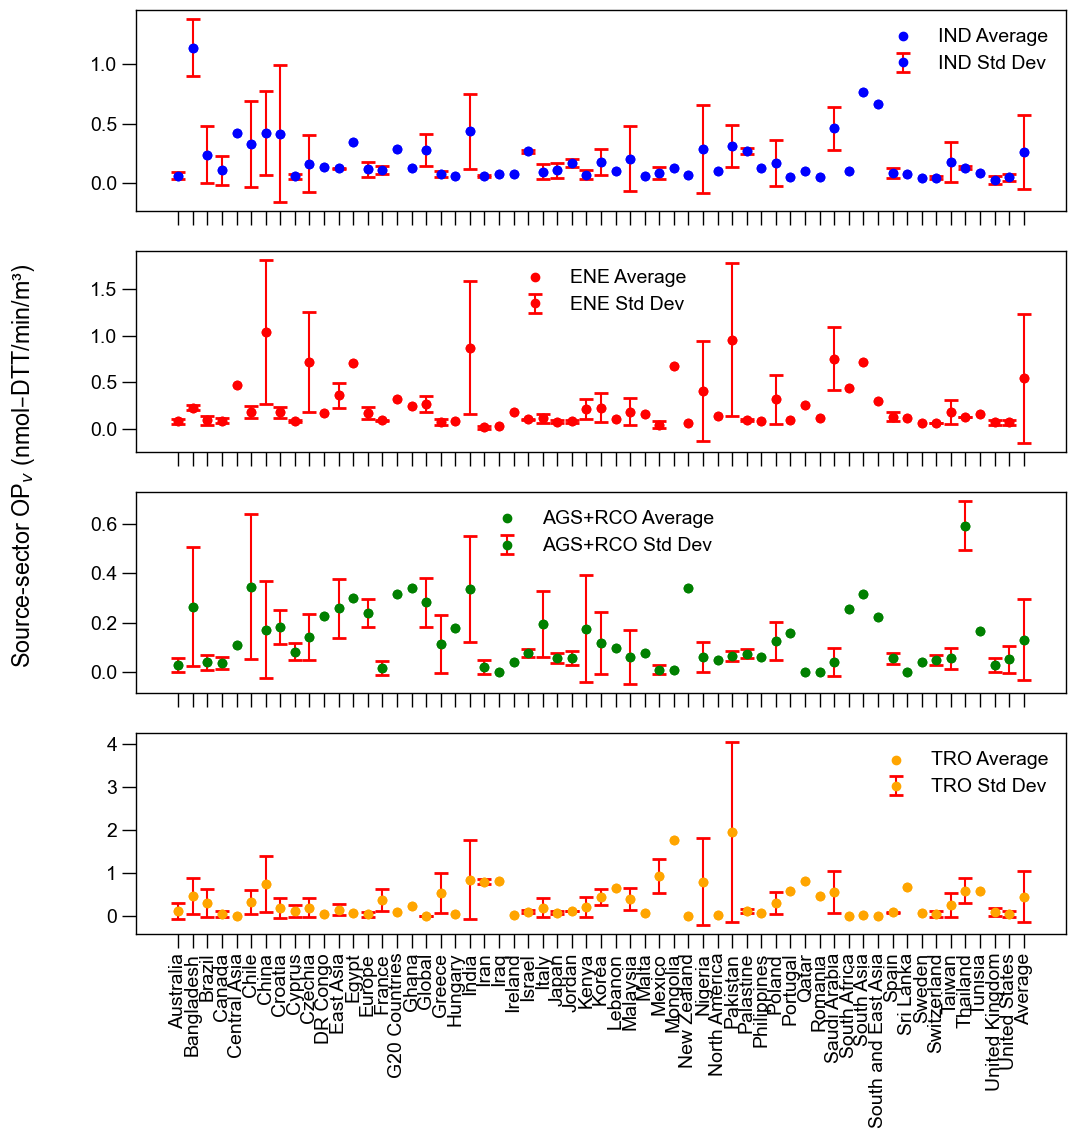

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample data for illustration. Replace this with your actual DataFrame.
# sorted_flitshap_df = pd.read_csv('your_data.csv')

# Define the columns of interest
columns = ['IND', 'ENE', 'AGS+RCO', 'TRO']
colors = ['blue', 'r', 'g', 'orange']  # Define colors for each column

# (1) Find the average and standard deviation of each column by country
grouped_stats = sorted_flitshap_df.groupby('Country/Region')[columns].agg(['mean', 'std']).reset_index()

# Flatten the MultiIndex columns
grouped_stats.columns = ['Country/Region'] + [f'{col}_{stat}' for col in columns for stat in ['mean', 'std']]

# (2) Add a new row called "world" with the average and standard deviation of each column across all countries
world_stats = {'Country/Region': 'Average'}
for col in columns:
    world_stats[f'{col}_mean'] = sorted_flitshap_df[col].mean()
    world_stats[f'{col}_std'] = sorted_flitshap_df[col].std()

grouped_stats = grouped_stats.append(world_stats, ignore_index=True)

# (3) Plotting
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 12), sharex=True)

for i, col in enumerate(columns):
    ax = axs[i]
    means = grouped_stats[f'{col}_mean']
    std_devs = grouped_stats[f'{col}_std']
    countries = grouped_stats['Country/Region']
    
    color = colors[i]
    
    ax.errorbar(countries, means, yerr=std_devs, fmt='o', capsize=5, capthick=2, ecolor='red', label=f'{col} Std Dev', color=color)
    ax.scatter(countries, means, label=f'{col} Average', color=color)
    
    # Remove individual y-axis labels
    ax.set_ylabel('')
    ax.legend(frameon=False)
    #ax.set_yscale('log')


    if i != len(columns) - 1:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(countries, rotation=90)

# Add a general y-axis label using suptitle
fig.supylabel(r'Source-sector OP$_{v}$ (nmol–DTT/min/m³)')

# Adjust layout to fit the super label
plt.show()

C:\Users\esuch\AppData\Local\Temp\ipykernel_13776\1297608924.py:41: UserWarning:

FixedFormatter should only be used together with FixedLocator



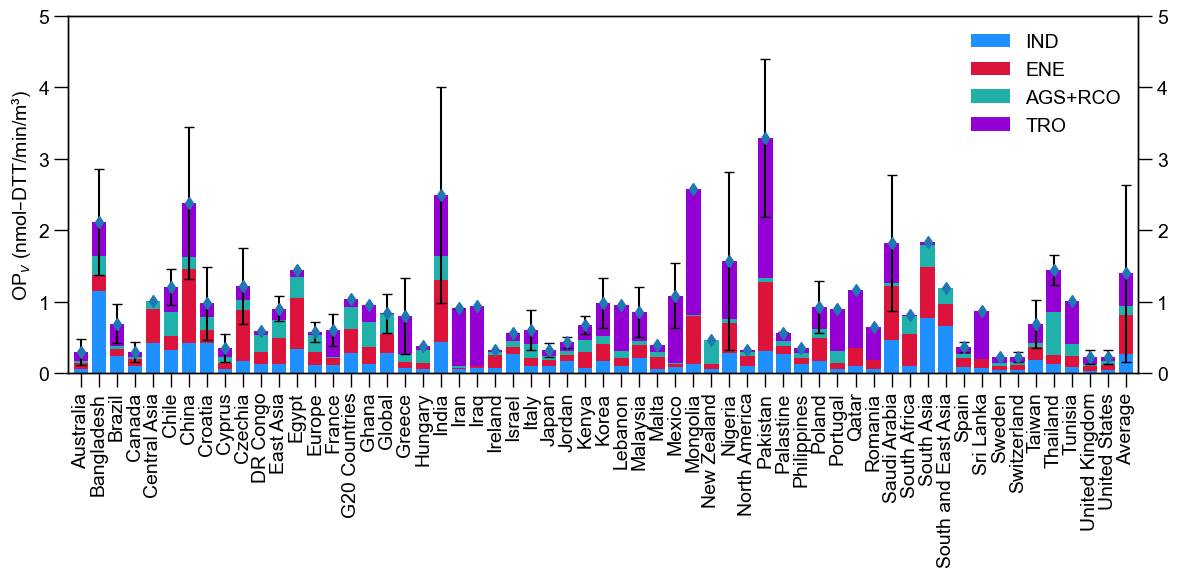

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming `sorted_flitshap_df` is already defined
# (1) Sum the columns IND, ENE, AGS+RCO, and TRO to create a new column "row_total"
sorted_flitshap_df['row_total'] = sorted_flitshap_df[['IND', 'ENE', 'AGS+RCO', 'TRO']].sum(axis=1)

# (2) Find the average and standard deviation of the columns by country (group by the "Country/Region" column)
grouped_stats = sorted_flitshap_df.groupby('Country/Region')[['IND', 'ENE', 'AGS+RCO', 'TRO']].mean().reset_index()
grouped_stats_std = sorted_flitshap_df.groupby('Country/Region')['row_total'].std().reset_index()
grouped_stats_std.rename(columns={'row_total': 'std_dev'}, inplace=True)

# Merge the mean values with the standard deviation
grouped_stats = pd.merge(grouped_stats, grouped_stats_std, on='Country/Region')

# (3) Add a new row called "world" with the average and standard deviation of the columns across all countries
world_stats = pd.DataFrame({
    'Country/Region': ['Average'],
    'IND': [sorted_flitshap_df['IND'].mean()],
    'ENE': [sorted_flitshap_df['ENE'].mean()],
    'AGS+RCO': [sorted_flitshap_df['AGS+RCO'].mean()],
    'TRO': [sorted_flitshap_df['TRO'].mean()],
    'std_dev': [sorted_flitshap_df['row_total'].std()]
})
grouped_stats = pd.concat([grouped_stats, world_stats], ignore_index=True)

# (4) Create the plot with stacked bars on the primary y-axis and error bars on the secondary y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the stacked bars
bottoms = np.zeros(len(grouped_stats))
colors = ['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet']

for idx, col in enumerate(['IND', 'ENE', 'AGS+RCO', 'TRO']):
    ax1.bar(grouped_stats['Country/Region'], grouped_stats[col], bottom=bottoms, color=colors[idx], label=col)
    bottoms += grouped_stats[col]

# Set limits for the primary y-axis
ax1.set_ylim(0, 5)
ax1.set_xticklabels(grouped_stats['Country/Region'], rotation=90)
ax1.set_ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)')
ax1.legend(frameon=False)

# Create a secondary y-axis for the error bars
ax2 = ax1.twinx()
ax2.errorbar(grouped_stats['Country/Region'], bottoms, yerr=grouped_stats['std_dev'], fmt='d', capsize=3.5, capthick=1, ecolor='black')

# Adjust x-axis limits to start closer to the bars
ax1.set_xlim(-0.7, len(grouped_stats['Country/Region']) - 0.3)

# Set limits for the secondary y-axis
ax2.set_ylim(0, 5)

plt.tight_layout()
#plt.savefig('OPSA.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

In [42]:
# Summing the columns to create a new column 'OP'
grouped_stats['OP'] = grouped_stats[['IND', 'ENE', 'AGS+RCO', 'TRO']].sum(axis=1)

# Saving the updated DataFrame to a CSV file
#grouped_stats.to_csv('updated_grouped_stats.csv', index=False)

print("CSV saved successfully.")

CSV saved successfully.


In [43]:
grouped_stats

,Country/Region,IND,ENE,AGS+RCO,TRO,std_dev,OP
0,Australia,0.059140,0.084407,0.028350,0.126805,0.179753,0.298703
1,Bangladesh,1.142463,0.230491,0.264563,0.476770,0.741127,2.114286
2,Brazil,0.236739,0.095904,0.039304,0.318219,0.270637,0.690165
3,Canada,0.104731,0.089735,0.035868,0.061688,0.140495,0.292022
4,Central Asia,0.419999,0.475137,0.108358,0.000000,NaN,1.003493
5,Chile,0.326253,0.187336,0.345876,0.340020,0.252175,1.199485
6,China,0.421179,1.038237,0.171375,0.752192,1.063810,2.382983
7,Croatia,0.415654,0.181672,0.183469,0.195957,0.512507,0.976753
8,Cyprus,0.054288,0.086970,0.083029,0.123262,0.197865,0.347549
9,Czechia,0.161299,0.717645,0.141851,0.198056,0.533247,1.218850


C:\Users\esuch\AppData\Local\Temp\ipykernel_13776\1385785059.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



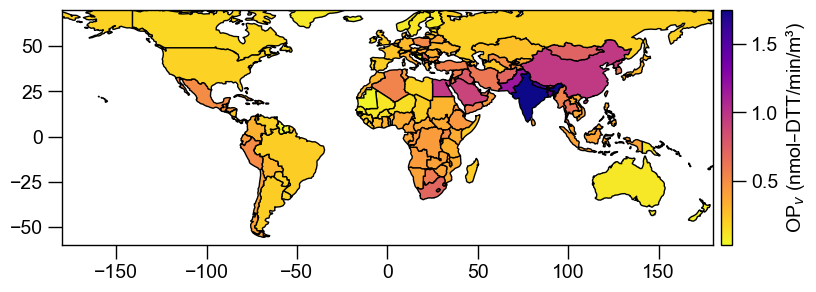

In [45]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from fuzzywuzzy import process

# Load your data
data = pd.read_csv('country_OP.csv')

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Display the unique country names in the shapefile
shapefile_countries = world['name'].unique()

# Function to match country names using fuzzy matching
def match_country(name, choices, threshold=80):
    match, score = process.extractOne(name, choices)
    if score >= threshold:
        return match
    return None

# Apply the matching function to your data
data['matched_country'] = data['country_name'].apply(lambda x: match_country(x.replace('_', ' '), shapefile_countries))

# Remove rows where no good match was found
data = data.dropna(subset=['matched_country'])

# Merge the world shapefile with the data
merged = world.set_index('name').join(data.set_index('matched_country'))

# Plot the merged data, coloring countries by PM2.5_OP value
fig, ax = plt.subplots(1, 1, figsize=(10, 10))#, facecolor='lightblue')
#ax.set_facecolor('lightblue')
cax = merged.plot(column='Source_CRF', cmap='plasma_r', edgecolor='black', legend=True, ax=ax,
                  legend_kwds={'label': r'OP$_{v}$ (nmol–DTT/min/m³)', 'orientation': "vertical", 'shrink': 0.305, 'pad': 0.01})

# Set y-axis limits (latitude)
ax.set_ylim(-60, 70)
ax.set_xlim(-180, 180)

# Adjust legend font size and other properties
#legend = cax.get_legend()
#legend.set_bbox_to_anchor((0.5, -0.1))
#legend.set_frame_on(False)
#for text in legend.get_texts():
    #text.set_fontsize(10)

# Show the plot
#plt.savefig('globalOP_distribution.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

C:\Users\esuch\AppData\Local\Temp\ipykernel_13776\1779673422.py:11: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



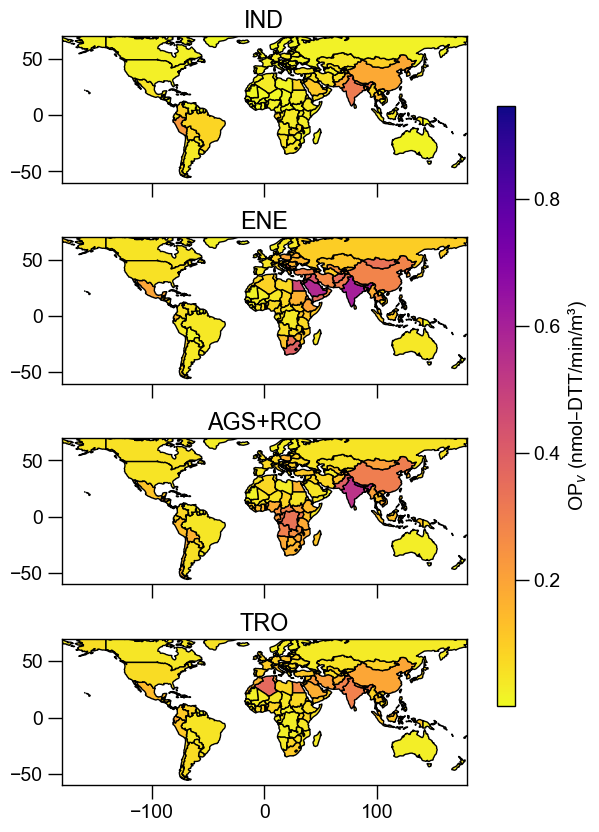

In [46]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from fuzzywuzzy import process
import matplotlib.colors as mcolors

# Load your data
data = pd.read_csv('country_OP.csv')

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Display the unique country names in the shapefile
shapefile_countries = world['name'].unique()

# Function to match country names using fuzzy matching
def match_country(name, choices, threshold=80):
    match, score = process.extractOne(name, choices)
    if score >= threshold:
        return match
    return None

# Apply the matching function to your data
data['matched_country'] = data['country_name'].apply(lambda x: match_country(x.replace('_', ' '), shapefile_countries))

# Remove rows where no good match was found
data = data.dropna(subset=['matched_country'])

# Merge the world shapefile with the data
merged = world.set_index('name').join(data.set_index('matched_country'))

# Define the columns to plot
columns_to_plot = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Define the titles for the subplots
Title = ['IND', 'ENE', 'AGS+RCO', 'TRO']

# Create a 4x1 subplot structure
fig, axs = plt.subplots(4, 1, figsize=(6, 10))

# Flatten the axes array for easier iteration
axs = axs.flatten()

# Define a color map and normalization
cmap = 'plasma_r'
norm = mcolors.Normalize(vmin=data[columns_to_plot].min().min(), vmax=data[columns_to_plot].max().max())

# Plot each column in a separate subplot
for i, (ax, column, title) in enumerate(zip(axs, columns_to_plot, Title)):
    #ax.set_facecolor('lightblue')
    merged.plot(column=column, cmap=cmap, edgecolor='black', ax=ax, norm=norm)
    ax.set_title(title)
    
    # Remove only x-axis labels for the first three subplots
    if i < 3:
        ax.set_xticklabels([])  # Remove x-axis labels but keep ticks

    # Set y-axis and x-axis limits (latitude and longitude)
    ax.set_ylim(-60, 70)
    ax.set_xlim(-180, 180)

# Adjust the position of the subplots and add a color bar
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm._A = []
fig.colorbar(sm, cax=cbar_ax, label=r'OP$_{v}$ (nmol–DTT/min/m³)')

# Show the plot
#plt.savefig('globalsourceOP_distribution_vstacked.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

C:\Users\esuch\AppData\Local\Temp\ipykernel_13776\3280349150.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



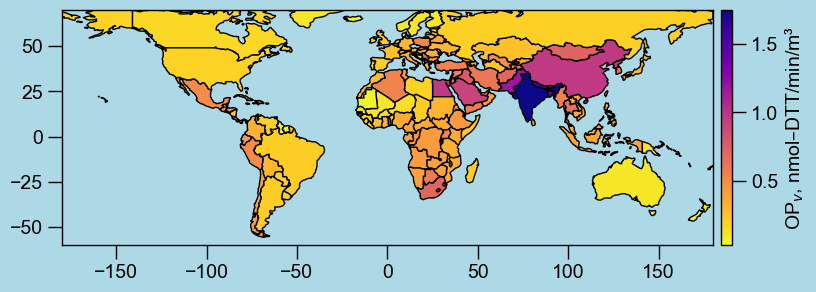

In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from fuzzywuzzy import process

# Load your data
data = pd.read_csv('country_OP.csv')

# Load the world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Display the unique country names in the shapefile
shapefile_countries = world['name'].unique()

# Function to match country names using fuzzy matching
def match_country(name, choices, threshold=80):
    match, score = process.extractOne(name, choices)
    if score >= threshold:
        return match
    return None

# Apply the matching function to your data
data['matched_country'] = data['country_name'].apply(lambda x: match_country(x.replace('_', ' '), shapefile_countries))

# Remove rows where no good match was found
data = data.dropna(subset=['matched_country'])

# Merge the world shapefile with the data
merged = world.set_index('name').join(data.set_index('matched_country'))

# Plot the merged data, coloring countries by PM2.5_OP value
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor='lightblue')
ax.set_facecolor('lightblue')
cax = merged.plot(column='Source_CRF', cmap='plasma_r', edgecolor='black', legend=True, ax=ax,
                  legend_kwds={'label': r'OP$_{v}$, nmol–DTT/min/m³', 'orientation': "vertical", 'shrink': 0.305, 'pad': 0.01})

# Set y-axis limits (latitude)
ax.set_ylim(-60, 70)
ax.set_xlim(-180, 180)

# Adjust legend font size and other properties
#legend = cax.get_legend()
#legend.set_bbox_to_anchor((0.5, -0.1))
#legend.set_frame_on(False)
#for text in legend.get_texts():
    #text.set_fontsize(10)

# Show the plot
#plt.savefig('Global_OP_2017_allblue', bbox_inches='tight',dpi=1200)
plt.show()#plt.savefig(f'{country_name}_pie_chart.png', bbox_inches='tight',dpi=1200)

(0.0, 1.0, 0.0, 1.0)

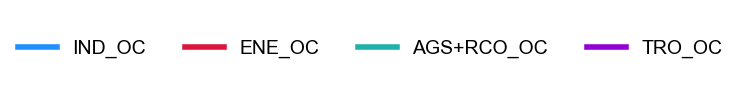

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your data
data = pd.read_csv('country_OP.csv')

# Sort data by "Source_CRF" column
data_sorted = data.sort_values(by='Source_CRF', ascending=False)

# Select the top 5 countries
top_15 = data_sorted.head(203)

# Define the columns for the pie chart
pie_columns_op = ['IND_OC', 'ENE_OC', 'AGS+RCO_OC', 'TRO_OC']
labels_op = pie_columns_op
colors = ['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet']
#colors = ['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet']

# Plot and save pie charts for each country
for idx, row in top_15.iterrows():
    country_name = row['country_name'].replace('_', ' ')
    source_crf = row['Source_CRF']
    values_op = row[pie_columns_op].values

    # Create a figure with a single subplot
    fig, ax = plt.subplots(figsize=(1.0, 1.0))

    # Pie chart for OP
    wedges_op, texts_op = ax.pie(
        values_op, 
        colors=colors, 
        startangle=90, 
        wedgeprops=dict(edgecolor='black', linewidth=1.0)
    )

    # Annotate country name and values
    plt.figtext(0.5, 0.005, f'{country_name}', ha='center')
    plt.figtext(0.5, 0.85, f'{round(source_crf, 2)}', ha='center')# r'nmolDTT/min/m³'


    # Save the figure
    plt.savefig(f'{country_name}_pie_chart.png', bbox_inches='tight', dpi=1200, transparent=True)
    plt.close()

# Create a legend figure
fig, ax = plt.subplots(figsize=(2, 1))
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors]
ax.legend(handles, labels_op, loc='center', ncol=len(labels_op), frameon=False)
ax.axis('off')

# Save the legend figure
#plt.savefig('legend.tif', bbox_inches='tight', dpi=1200, transparent=True)

#plt.show()

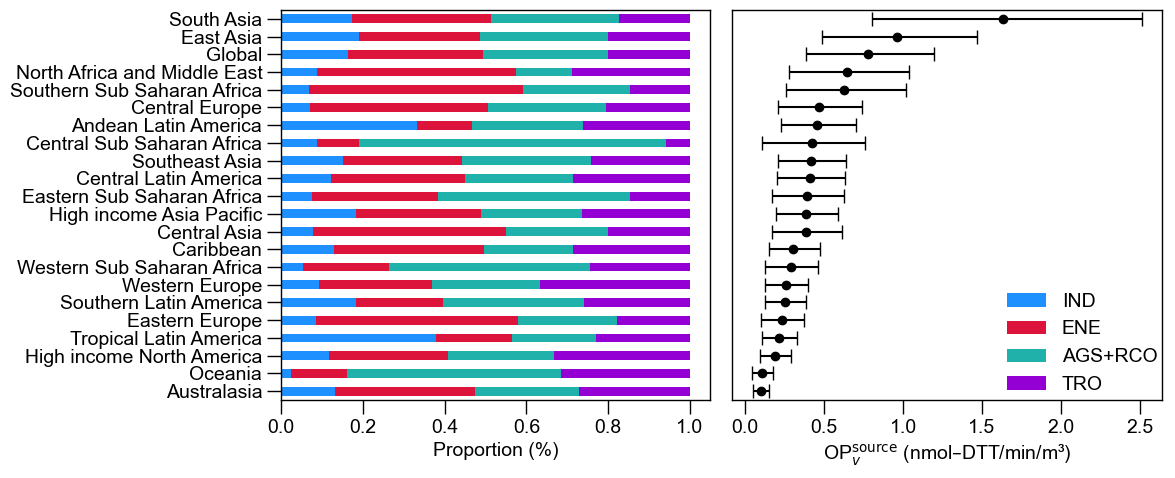

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('regional_OP.csv')

# Sort data by "Source-OP CRF" from highest to lowest
data_sorted = data.sort_values(by='Source-OP CRF', ascending=True)

# Define columns for the stacked bar plot and the scatter plot
bar_columns = ['IND', 'ENE', 'AGS+RCO', 'TRO']
crf_column = 'Source-OP CRF'
crf_lci_column = 'Source-OP CRF_LCI'
crf_uci_column = 'Source-OP CRF_UCI'
region_column = 'region'

# Normalize data for 100% stacked bar plot
data_norm = data_sorted[bar_columns].div(data_sorted[bar_columns].sum(axis=1), axis=0)

# Initialize the figure with two subplots (side by side)
fig, axes = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [1, 1]})

# Plot the 100% horizontal stacked bar chart in sorted order
data_norm.plot(kind='barh', stacked=True, ax=axes[0], color=['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet'])

axes[0].set_yticks(np.arange(len(data_sorted)))
axes[0].set_yticklabels(data_sorted[region_column])
axes[0].set_xlabel('Proportion (%)')

# Remove extra space above 1 in the stacked bar plot
axes[0].set_ylim(-0.5, len(data_sorted) - 0.5)

# Plot the absolute values as a scatter plot with error bars
x = data_sorted[crf_column]
y = np.arange(len(data_sorted))  # Y locations for the scatter
y_err_lower = data_sorted[crf_lci_column]
y_err_upper = data_sorted[crf_uci_column]
y_err = [y_err_lower, y_err_upper]  # Adjust error bars relative to x

# Scatter plot for absolute values with confidence intervals in sorted order
axes[1].errorbar(x, y, xerr=y_err, fmt='o', color='black', capsize=5)
axes[1].set_xlabel(r'OP$_{v}^{\mathrm{source}}$ (nmol–DTT/min/m³)')
axes[1].invert_yaxis()  # Align with the bar chart's y-axis

# Remove y-axis labels and ticks for the scatter plot
axes[1].set_yticks([])
axes[1].set_ylabel('')

# Ensure the y-limits match between the two plots
axes[1].set_ylim(axes[0].get_ylim())

# Move the stacked bar legend into the scatter plot area
handles, labels = axes[0].get_legend_handles_labels()
axes[1].legend(handles, labels, loc='upper left', bbox_to_anchor=(0.6, 0.32), frameon=False)

# Remove legend from the stacked bar plot
axes[0].get_legend().remove()

# Adjust layout to fit the plots and labels
plt.tight_layout()

# Show the plot
#plt.savefig('regionalOP.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


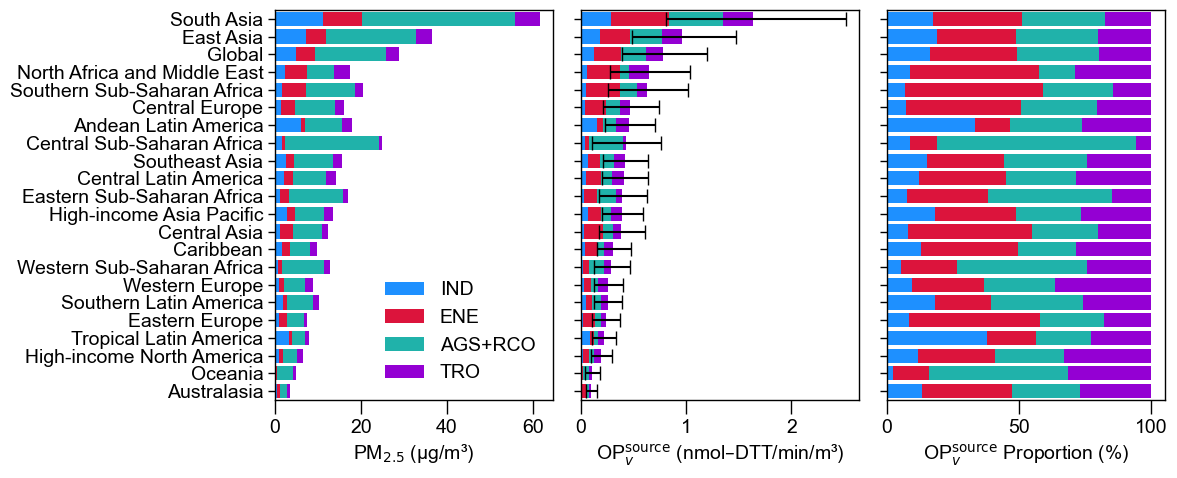

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('regional_OP.csv')

# Sort data by "Source-OP CRF" from highest to lowest
data_sorted = data.sort_values(by='Source-OP CRF', ascending=True)

# Define columns for the plots
pm25_columns = ['IND_C', 'ENE_C', 'AGS+RCO_C', 'TRO_C']
op_columns = ['IND_OP', 'ENE_OP', 'AGS+RCO_OP', 'TRO_OP']
proportion_columns = ['IND', 'ENE', 'AGS+RCO', 'TRO']
crf_lci_column = 'Source-OP CRF_LCI'
crf_uci_column = 'Source-OP CRF_UCI'
region_column = 'region'

# Initialize the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 5), sharey=True, gridspec_kw={'width_ratios': [1, 1, 1]})

# Subplot 1: Stacked bar chart for PM2.5 concentrations
for i, column in enumerate(pm25_columns):
    axes[0].barh(np.arange(len(data_sorted)), data_sorted[column], color=['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet'][i], 
                 left=data_sorted[pm25_columns[:i]].sum(axis=1))
axes[0].set_xlabel(r'PM$_{2.5}$ (µg/m³)')
axes[0].set_yticks(np.arange(len(data_sorted)))
axes[0].set_yticklabels(data_sorted[region_column])
axes[0].legend(proportion_columns, loc='lower right', frameon=False)
#axes[0].legend(handles, labels, loc='upper left', bbox_to_anchor=(0.6, 0.32), frameon=False)

# Subplot 2: Bar chart for OPsource with error bars
for i, column in enumerate(op_columns):
    axes[1].barh(np.arange(len(data_sorted)), data_sorted[column], color=['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet'][i], 
                 left=data_sorted[op_columns[:i]].sum(axis=1))
err_lower = data_sorted[crf_lci_column]
err_upper = data_sorted[crf_uci_column]
axes[1].errorbar(data_sorted[op_columns].sum(axis=1), np.arange(len(data_sorted)), 
                 xerr=[err_lower, err_upper], 
                 fmt='none', color='black', capsize=5)
axes[1].set_xlabel(r'OP$_{v}^{\mathrm{source}}$ (nmol–DTT/min/m³)')
axes[1].legend().remove()  # Remove legend to keep only one in the first plot

# Subplot 3: 100% stacked bar chart for proportions (data already normalized)
for i, column in enumerate(proportion_columns):
    axes[2].barh(np.arange(len(data_sorted)), data_sorted[column], color=['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet'][i], 
                 left=data_sorted[proportion_columns[:i]].sum(axis=1))
axes[2].set_xlabel(r'OP$_{v}^{\mathrm{source}}$ Proportion (%)')
axes[2].legend().remove()  # Remove legend to keep only one in the first plot

# Shared Y-axis settings
for ax in axes:
    ax.set_yticks(np.arange(len(data_sorted)))
    ax.set_yticklabels([])  # Only the first subplot will show labels
    ax.tick_params(axis='y', which='major', length=5)  # Retain only major ticks

axes[0].set_yticklabels(data_sorted[region_column])

# Ensure consistent bar sizes across subplots
for ax in axes:
    ax.set_xlim(left=0)
    ax.set_ylim(-0.5, len(data_sorted) - 0.5)

# Adjust layout and show the plot
plt.tight_layout()
plt.savefig('regionalPM&OP.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

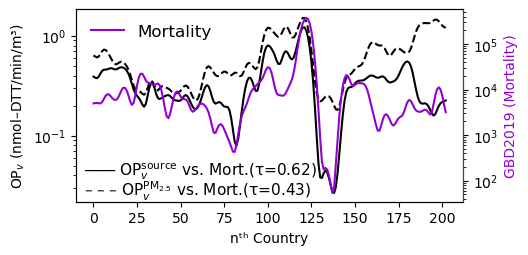

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import spearmanr

# Load your data
data = pd.read_csv('country_OP.csv')

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(5, 2.5))

# Plot the first primary y-axis data (Source_CRF)
primary_column_1 = 'Source_CRF'
smoothed_primary_data_1 = gaussian_filter1d(data[primary_column_1], sigma=2)
ax1.plot(data.index, smoothed_primary_data_1, label=primary_column_1, color='black')

# Calculate Spearman correlation with GBD2019_CRF for Source_CRF
corr_1, _ = spearmanr(data[primary_column_1], data['GBD2019_CRF'])

# Plot the second primary y-axis data (PM2.5_CRF)
primary_column_2 = 'PM2.5_CRF'
smoothed_primary_data_2 = gaussian_filter1d(data[primary_column_2], sigma=2)
ax1.plot(data.index, smoothed_primary_data_2, label=primary_column_2, linestyle='--', color='black')

# Calculate Spearman correlation with GBD2019_CRF for PM2.5_CRF
corr_2, _ = spearmanr(data[primary_column_2], data['GBD2019_CRF'])

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot secondary y-axis data (GBD2019_CRF)
secondary_column = 'GBD2019_CRF'
smoothed_secondary_data = gaussian_filter1d(data[secondary_column], sigma=2)
line2, = ax2.plot(data.index, smoothed_secondary_data, label=secondary_column, color='darkviolet', linestyle='-')

# Display Spearman correlations on the plot with lines
ax1.text(0.02, 0.22, f"―― OP$_{{v}}^{{\\mathrm{{source}}}}$ vs. Mort.(τ={corr_1:.2f})",
         transform=ax1.transAxes, ha='left', va='top', fontsize=11)
ax1.text(0.02, 0.12, f"– – – OP$_{{v}}^{{\\mathrm{{PM_{{2.5}}}}}}$ vs. Mort.(τ={corr_2:.2f})",
         transform=ax1.transAxes, ha='left', va='top', fontsize=11)

# Set labels
ax1.set_xlabel('nᵗʰ Country')
ax1.set_ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)')
ax2.set_ylabel('GBD2019 (Mortality)', color='darkviolet')

# Set log scales
ax1.set_yscale('log')
ax2.set_yscale('log')

# Customize plot appearance
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('teal')  # Matches Source_CRF color
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('darkviolet')
ax2.spines['bottom'].set_color('black')

# Add legend
ax2.legend([line2], ["Mortality"], loc='upper left', frameon=False,fontsize=12)

# Show plot
plt.savefig('mortalityOP_corr.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

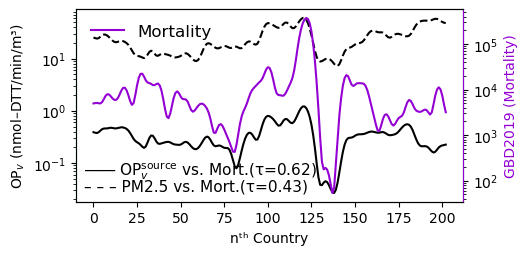

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import spearmanr

# Load your data
data = pd.read_csv('country_OP.csv')

# Create a figure and primary axis
fig, ax1 = plt.subplots(figsize=(5, 2.5))

# Plot the first primary y-axis data (Source_CRF)
primary_column_1 = 'Source_CRF'
smoothed_primary_data_1 = gaussian_filter1d(data[primary_column_1], sigma=2)
ax1.plot(data.index, smoothed_primary_data_1, label=primary_column_1, color='black')

# Calculate Spearman correlation with GBD2019_CRF for Source_CRF
corr_1, _ = spearmanr(data[primary_column_1], data['GBD2019_CRF'])

# Plot the second primary y-axis data (PM2.5_CRF)
primary_column_2 = 'PM2.5'
smoothed_primary_data_2 = gaussian_filter1d(data[primary_column_2], sigma=2)
ax1.plot(data.index, smoothed_primary_data_2, label=primary_column_2, linestyle='--', color='black')

# Calculate Spearman correlation with GBD2019_CRF for PM2.5_CRF
corr_2, _ = spearmanr(data[primary_column_2], data['GBD2019_CRF'])

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot secondary y-axis data (GBD2019_CRF)
secondary_column = 'GBD2019_CRF'
smoothed_secondary_data = gaussian_filter1d(data[secondary_column], sigma=2)
line2, = ax2.plot(data.index, smoothed_secondary_data, label=secondary_column, color='darkviolet', linestyle='-')

# Display Spearman correlations on the plot with lines
ax1.text(0.02, 0.22, f"―― OP$_{{v}}^{{\\mathrm{{source}}}}$ vs. Mort.(τ={corr_1:.2f})",
         transform=ax1.transAxes, ha='left', va='top', fontsize=11)
ax1.text(0.02, 0.12, f"– – – PM2.5 vs. Mort.(τ={corr_2:.2f})",
         transform=ax1.transAxes, ha='left', va='top', fontsize=11)

# Set labels
ax1.set_xlabel('nᵗʰ Country')
ax1.set_ylabel(r'OP$_{v}$ (nmol–DTT/min/m³)')
ax2.set_ylabel('GBD2019 (Mortality)', color='darkviolet')

# Set log scales
ax1.set_yscale('log')
ax2.set_yscale('log')

# Customize plot appearance
ax1.spines['top'].set_color('black')
ax1.spines['right'].set_color('black')
ax1.spines['bottom'].set_color('black')
ax1.spines['left'].set_color('teal')  # Matches Source_CRF color
ax2.spines['top'].set_color('black')
ax2.spines['right'].set_color('darkviolet')
ax2.spines['bottom'].set_color('black')

# Add legend
ax2.legend([line2], ["Mortality"], loc='upper left', frameon=False,fontsize=12)

# Show plot
plt.savefig('mortalityOP_corr.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

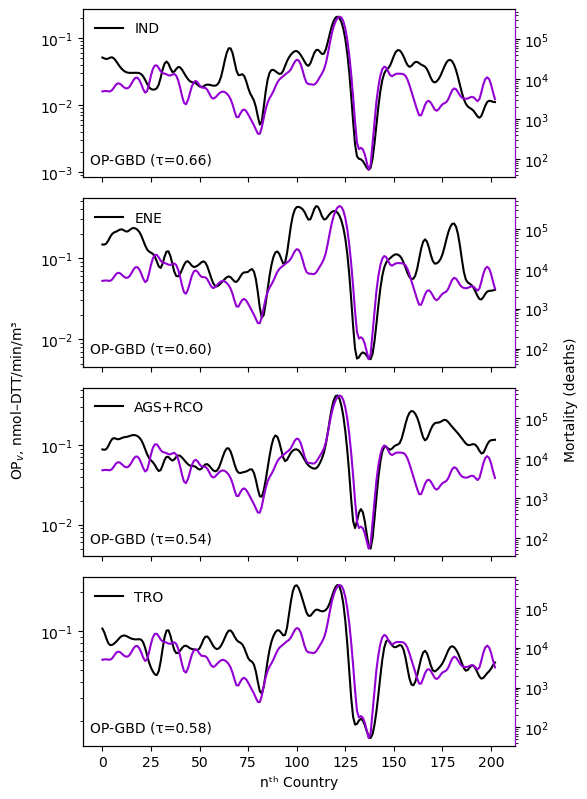

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from scipy.stats import spearmanr

# Load your data
data = pd.read_csv('country_OP.csv')

# Define the primary columns to plot
primary_columns = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Create a figure and set of subplots (4x1)
fig, axs = plt.subplots(len(primary_columns), 1, figsize=(6, 9))

# Secondary column (only GBD2019_CRF) and line style
secondary_column = 'GBD2019_CRF'
line_style = '-'

# Plot each primary column in a separate subplot
for i, column in enumerate(primary_columns):
    ax1 = axs[i]
    
    # Modify the label to remove "_OB"
    label = column.replace('_OB', '')

    # Plot primary y-axis data in black
    smoothed_primary_data = gaussian_filter1d(data[column], sigma=2)
    ax1.plot(data.index, smoothed_primary_data, label=label, color='black')

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Plot secondary y-axis data (GBD2019_CRF) and calculate Spearman correlation
    smoothed_secondary_data = gaussian_filter1d(data[secondary_column], sigma=2)
    ax2.plot(data.index, smoothed_secondary_data, linestyle=line_style, label=secondary_column, color='darkviolet')
    
    # Compute Spearman correlation
    corr, _ = spearmanr(data[column], data[secondary_column])

    # Display Spearman correlation on the plot
    ax1.text(0.3, 0.15, f"OP-GBD (τ={corr:.2f})",
             transform=ax1.transAxes, ha='right', va='top', fontsize=10, color='black')

    # Add primary legend for each subplot
    ax1.legend(loc='upper left', frameon=False)

    # Turn off gridlines
    ax1.grid(False)
    ax2.grid(False)

    # Remove x-label for the first three subplots
    if i < len(primary_columns) - 1:
        ax1.set_xticklabels([])

    # Set secondary y-axis to log scale
    ax2.set_yscale('log')
    ax1.set_yscale('log')

    # Set plot frame to black
    ax1.spines['top'].set_color('black')
    ax1.spines['right'].set_color('black')
    ax1.spines['bottom'].set_color('black')
    ax1.spines['left'].set_color('black')
    ax2.spines['top'].set_color('black')
    ax2.spines['right'].set_color('darkviolet')
    ax2.spines['bottom'].set_color('black')

# General y-labels using fig.text() for better control
fig.text(0.04, 0.5, r'OP$_{v}$, nmol–DTT/min/m³', ha='center', va='center', rotation='vertical')
fig.text(0.96, 0.5, 'Mortality (deaths)', ha='center', va='center', rotation='vertical')

# Set x-label for the bottom subplot only
axs[-1].set_xlabel('nᵗʰ Country')

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])

# Show plot
#plt.savefig('mortality_sourceOP_corr.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

### Poisson model

### Test for Overdispersion

In [11]:
# Calculate mean and variance of the response variable
mean_count = data['GBD2019_CRF'].mean()
variance_count = data['GBD2019_CRF'].var()

# Calculate the overdispersion ratio
overdispersion_ratio = variance_count / mean_count

print(f"Mean of GBD2019_CRF: {mean_count}")
print(f"Variance of GBD2019_CRF: {variance_count}")
print(f"Overdispersion Ratio: {overdispersion_ratio}")

# Interpretation
if overdispersion_ratio > 1:
    print("The data exhibits overdispersion.")
elif overdispersion_ratio == 1:
    print("The data is equidispersed (Poisson is appropriate).")
else:
    print("The data exhibits underdispersion.")


Mean of GBD2019_CRF: 19067.925373134327
Variance of GBD2019_CRF: 13303667931.419401
Overdispersion Ratio: 697698.7622451863
The data exhibits overdispersion.


### NegativeBinomial method accounting for overdispersion

### Comparing quality of Poisson and Binomial model

In [13]:
print(poisson_model.aic)
print(poisson_model.bic)

10266287.03733372
10263406.354950357


C:\Users\esuch\anaconda3\Lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning:

The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.



In [14]:
print(negative_binomial_model.aic)
print(negative_binomial_model.bic)

3968.6937659865894
-399.09449952474483


## mortality and OP - GBD2019

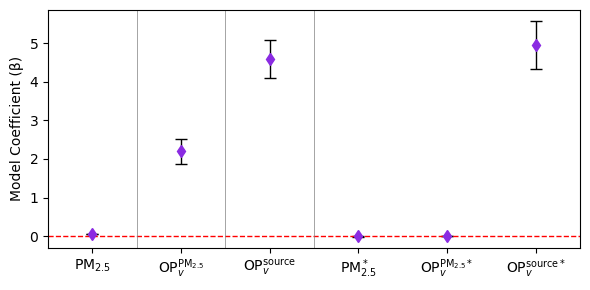

Model 1: PM2.5 alone
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.8
Date:                Thu, 06 Feb 2025   Deviance:                       853.09
Time:                        14:28:42   Pearson chi2:                 1.94e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6963
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8586      0.12

In [3]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# Scenario 1: PM2.5 alone
X1 = sm.add_constant(data[['PM2.5']])
model1 = sm.GLM(y, X1, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Scenario 2: PM2.5_CRF alone
X2 = sm.add_constant(data[['PM2.5_CRF']])
model2 = sm.GLM(y, X2, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Scenario 3: Source_CRF alone
X3 = sm.add_constant(data[['Source_CRF']])
model3 = sm.GLM(y, X3, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Scenario 4: PM2.5 + PM2.5_CRF + Source_CRF together
X4 = sm.add_constant(data[['PM2.5', 'PM2.5_CRF', 'Source_CRF']])
model4 = sm.GLM(y, X4, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Extract model coefficients and confidence intervals
def extract_coef_and_ci(model, var_name):
    coef = model.params[var_name]
    ci_lower, ci_upper = model.conf_int().loc[var_name]
    return coef, ci_lower, ci_upper

# Extract values
coef_pm25_1, ci_lower_pm25_1, ci_upper_pm25_1 = extract_coef_and_ci(model1, 'PM2.5')
coef_pm25_crf_2, ci_lower_pm25_crf_2, ci_upper_pm25_crf_2 = extract_coef_and_ci(model2, 'PM2.5_CRF')
coef_source_3, ci_lower_source_3, ci_upper_source_3 = extract_coef_and_ci(model3, 'Source_CRF')
coef_pm25_4, ci_lower_pm25_4, ci_upper_pm25_4 = extract_coef_and_ci(model4, 'PM2.5')
coef_pm25_crf_4, ci_lower_pm25_crf_4, ci_upper_pm25_crf_4 = extract_coef_and_ci(model4, 'PM2.5_CRF')
coef_source_4, ci_lower_source_4, ci_upper_source_4 = extract_coef_and_ci(model4, 'Source_CRF')

# Prepare data for plotting
variables = [
    'PM$_{2.5}$', 
    'OP$_{v}^{\mathrm{PM_{2.5}}}$', 
    'OP$_{v}^{\mathrm{source}}$', 
    'PM$_{2.5}^*$', 
    'OP$_{v}^{\mathrm{PM_{2.5}}*}$', 
    'OP$_{v}^{\mathrm{source}*}$'
]

mean_coef = [
    coef_pm25_1, 
    coef_pm25_crf_2, 
    coef_source_3, 
    coef_pm25_4, 
    coef_pm25_crf_4, 
    coef_source_4
]
lower_bound = [
    ci_lower_pm25_1, 
    ci_lower_pm25_crf_2, 
    ci_lower_source_3, 
    ci_lower_pm25_4, 
    ci_lower_pm25_crf_4, 
    ci_lower_source_4
]
upper_bound = [
    ci_upper_pm25_1, 
    ci_upper_pm25_crf_2, 
    ci_upper_source_3, 
    ci_upper_pm25_4, 
    ci_upper_pm25_crf_4, 
    ci_upper_source_4
]

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_coef, 
             yerr=[np.array(mean_coef) - np.array(lower_bound), 
                   np.array(upper_bound) - np.array(mean_coef)], 
             fmt='d', color='blueviolet', ecolor='black', elinewidth=1, capsize=4, markersize=6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.ylabel('Model Coefficient (β)')

# Adjust x-axis limits to add padding
plt.xlim(-0.5, len(variables) - 0.5)

# Insert vertical lines to separate models
plt.axvline(x=0.5, color='gray', linestyle='-', linewidth=.5)
plt.axvline(x=1.5, color='gray', linestyle='-', linewidth=.5)
plt.axvline(x=2.5, color='gray', linestyle='-', linewidth=.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Display model summaries
print("Model 1: PM2.5 alone")
print(model1.summary())
print("\nModel 2: PM2.5_CRF alone")
print(model2.summary())
print("\nModel 3: Source_CRF alone")
print(model3.summary())
print("\nModel 4: PM2.5 + PM2.5_CRF + Source_CRF")
print(model4.summary())

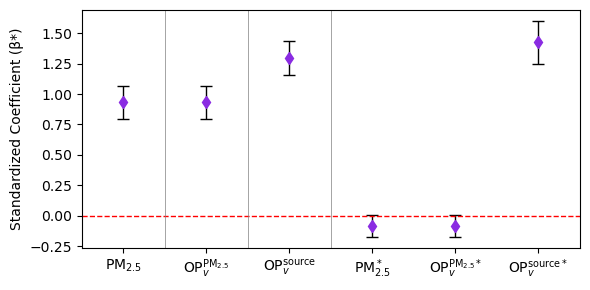

Model 1: PM2.5 alone
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2080.8
Date:                Thu, 06 Feb 2025   Deviance:                       853.09
Time:                        15:04:57   Pearson chi2:                 1.94e+03
No. Iterations:                     9   Pseudo R-squ. (CS):             0.6963
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2500      0.07

In [10]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# Define independent variables and standardize them
independent_vars = ['PM2.5', 'PM2.5_CRF', 'Source_CRF']
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Function to fit model and extract coefficients
def fit_model_and_extract_coef(X, y):
    X = sm.add_constant(X)  # Add intercept
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    return model

# Fit models using standardized independent variables
model1 = fit_model_and_extract_coef(data_std[['PM2.5']], y)
model2 = fit_model_and_extract_coef(data_std[['PM2.5_CRF']], y)
model3 = fit_model_and_extract_coef(data_std[['Source_CRF']], y)
model4 = fit_model_and_extract_coef(data_std[['PM2.5', 'PM2.5_CRF', 'Source_CRF']], y)

# Extract coefficients and confidence intervals
def extract_coef_and_ci(model, var_name):
    coef = model.params[var_name]
    ci_lower, ci_upper = model.conf_int().loc[var_name]
    return coef, ci_lower, ci_upper

# Extract values
coef_pm25_1, ci_lower_pm25_1, ci_upper_pm25_1 = extract_coef_and_ci(model1, 'PM2.5')
coef_pm25_crf_2, ci_lower_pm25_crf_2, ci_upper_pm25_crf_2 = extract_coef_and_ci(model2, 'PM2.5_CRF')
coef_source_3, ci_lower_source_3, ci_upper_source_3 = extract_coef_and_ci(model3, 'Source_CRF')
coef_pm25_4, ci_lower_pm25_4, ci_upper_pm25_4 = extract_coef_and_ci(model4, 'PM2.5')
coef_pm25_crf_4, ci_lower_pm25_crf_4, ci_upper_pm25_crf_4 = extract_coef_and_ci(model4, 'PM2.5_CRF')
coef_source_4, ci_lower_source_4, ci_upper_source_4 = extract_coef_and_ci(model4, 'Source_CRF')

# Prepare data for plotting
variables = [
    'PM$_{2.5}$', 
    'OP$_{v}^{\mathrm{PM_{2.5}}}$', 
    'OP$_{v}^{\mathrm{source}}$', 
    'PM$_{2.5}^*$', 
    'OP$_{v}^{\mathrm{PM_{2.5}}*}$', 
    'OP$_{v}^{\mathrm{source}*}$'
]

mean_coef = [
    coef_pm25_1, 
    coef_pm25_crf_2, 
    coef_source_3, 
    coef_pm25_4, 
    coef_pm25_crf_4, 
    coef_source_4
]
lower_bound = [
    ci_lower_pm25_1, 
    ci_lower_pm25_crf_2, 
    ci_lower_source_3, 
    ci_lower_pm25_4, 
    ci_lower_pm25_crf_4, 
    ci_lower_source_4
]
upper_bound = [
    ci_upper_pm25_1, 
    ci_upper_pm25_crf_2, 
    ci_upper_source_3, 
    ci_upper_pm25_4, 
    ci_upper_pm25_crf_4, 
    ci_upper_source_4
]

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_coef, 
             yerr=[np.array(mean_coef) - np.array(lower_bound), 
                   np.array(upper_bound) - np.array(mean_coef)], 
             fmt='d', color='blueviolet', ecolor='black', elinewidth=1, capsize=4, markersize=6)
plt.axhline(y=0, color='r', linestyle='--', linewidth=1)
plt.ylabel('Standardized Coefficient (β*)')

# Adjust x-axis limits to add padding
plt.xlim(-0.5, len(variables) - 0.5)

# Insert vertical lines to separate models
plt.axvline(x=0.5, color='gray', linestyle='-', linewidth=.5)
plt.axvline(x=1.5, color='gray', linestyle='-', linewidth=.5)
plt.axvline(x=2.5, color='gray', linestyle='-', linewidth=.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Display model summaries
print("Model 1: PM2.5 alone")
print(model1.summary())
print("\nModel 2: PM2.5_CRF alone")
print(model2.summary())
print("\nModel 3: Source_CRF alone")
print(model3.summary())
print("\nModel 4: PM2.5 + PM2.5_CRF + Source_CRF")
print(model4.summary())

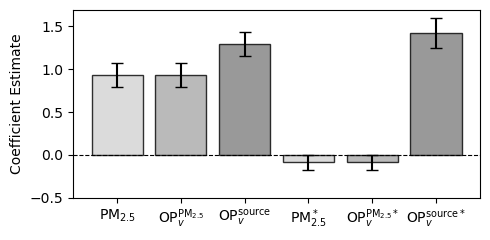

In [99]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# Define independent variables and standardize them
independent_vars = ['PM2.5', 'PM2.5_CRF', 'Source_CRF']
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Function to fit model and extract coefficients
def fit_model_and_extract_coef(X, y):
    X = sm.add_constant(X)  # Add intercept
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    return model

# Fit models using standardized independent variables
model1 = fit_model_and_extract_coef(data_std[['PM2.5']], y)
model2 = fit_model_and_extract_coef(data_std[['PM2.5_CRF']], y)
model3 = fit_model_and_extract_coef(data_std[['Source_CRF']], y)
model4 = fit_model_and_extract_coef(data_std[['PM2.5', 'PM2.5_CRF', 'Source_CRF']], y)

# Extract coefficients and confidence intervals
def extract_coef_and_ci(model, var_name):
    coef = model.params[var_name]
    ci_lower, ci_upper = model.conf_int().loc[var_name]
    return coef, ci_lower, ci_upper

# Extract values
coef_pm25_1, ci_lower_pm25_1, ci_upper_pm25_1 = extract_coef_and_ci(model1, 'PM2.5')
coef_pm25_crf_2, ci_lower_pm25_crf_2, ci_upper_pm25_crf_2 = extract_coef_and_ci(model2, 'PM2.5_CRF')
coef_source_3, ci_lower_source_3, ci_upper_source_3 = extract_coef_and_ci(model3, 'Source_CRF')
coef_pm25_4, ci_lower_pm25_4, ci_upper_pm25_4 = extract_coef_and_ci(model4, 'PM2.5')
coef_pm25_crf_4, ci_lower_pm25_crf_4, ci_upper_pm25_crf_4 = extract_coef_and_ci(model4, 'PM2.5_CRF')
coef_source_4, ci_lower_source_4, ci_upper_source_4 = extract_coef_and_ci(model4, 'Source_CRF')

# Prepare data for plotting
variables = [
    'PM$_{2.5}$', 
    'OP$_{v}^{\mathrm{PM_{2.5}}}$', 
    'OP$_{v}^{\mathrm{source}}$', 
    'PM$_{2.5}^*$', 
    'OP$_{v}^{\mathrm{PM_{2.5}}*}$', 
    'OP$_{v}^{\mathrm{source}*}$'
]

mean_coef = [
    coef_pm25_1, 
    coef_pm25_crf_2, 
    coef_source_3, 
    coef_pm25_4, 
    coef_pm25_crf_4, 
    coef_source_4
]
lower_bound = [
    ci_lower_pm25_1, 
    ci_lower_pm25_crf_2, 
    ci_lower_source_3, 
    ci_lower_pm25_4, 
    ci_lower_pm25_crf_4, 
    ci_lower_source_4
]
upper_bound = [
    ci_upper_pm25_1, 
    ci_upper_pm25_crf_2, 
    ci_upper_source_3, 
    ci_upper_pm25_4, 
    ci_upper_pm25_crf_4, 
    ci_upper_source_4
]

# Define shades of grey for bars
grey_shades = ['#D3D3D3', '#A9A9A9', '#808080', '#D3D3D3', '#A9A9A9', '#808080']

# Plot the results using bars
plt.figure(figsize=(5, 2.5))
plt.bar(variables, mean_coef, yerr=[np.array(mean_coef) - np.array(lower_bound), 
                                    np.array(upper_bound) - np.array(mean_coef)], 
        color=grey_shades, edgecolor='black', capsize=4, alpha=0.8)

# Add horizontal line at zero
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Label y-axis
plt.ylabel('Coefficient Estimate')

# Set y-axis ticks manually
plt.yticks([-0.5, 0, 0.5, 1.0, 1.50])

# Adjust layout
plt.tight_layout()
#plt.savefig('coefficient1.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

In [100]:
data_std

,PM2.5,PM2.5_CRF,Source_CRF
0,0.390650,0.390650,0.645463
1,-0.082195,-0.082195,-0.096853
2,-0.442738,-0.442738,-0.293160
3,-0.371812,-0.371812,-0.288375
4,-0.141300,-0.141300,0.066258
...,...,...,...
198,2.299759,2.299759,0.028240
199,0.248797,0.248797,-0.306048
200,2.081069,2.081069,-0.891218
201,1.354071,1.354071,-0.486825


In [101]:
data_std.to_csv("data_std1.csv")

In [17]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# Scenario 1: PM2.5 alone
X1 = data[['PM2.5']]
X1 = sm.add_constant(X1)
model1 = sm.GLM(y, X1, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Scenario 2: PM2.5_CRF alone
X2 = data[['PM2.5_CRF']]
X2 = sm.add_constant(X2)
model2 = sm.GLM(y, X2, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Scenario 3: Source_CRF alone
X3 = data[['Source_CRF']]
X3 = sm.add_constant(X3)
model3 = sm.GLM(y, X3, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Scenario 4: PM2.5 + PM2.5_CRF + Source_CRF together
X4 = data[['PM2.5', 'PM2.5_CRF', 'Source_CRF']]
X4 = sm.add_constant(X4)
model4 = sm.GLM(y, X4, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Calculate IQR for each variable
IQR_PM25 = np.percentile(data['PM2.5'], 75) - np.percentile(data['PM2.5'], 25)
IQR_PM25_CRF = np.percentile(data['PM2.5_CRF'], 75) - np.percentile(data['PM2.5_CRF'], 25)
IQR_Source = np.percentile(data['Source_CRF'], 75) - np.percentile(data['Source_CRF'], 25)

# Function to calculate RR and CI per IQR
def calculate_rr_and_ci(model, var_name, IQR):
    coef = model.params[var_name]
    rr = np.exp(coef * IQR)
    ci_lower = np.exp((model.conf_int().loc[var_name][0]) * IQR)
    ci_upper = np.exp((model.conf_int().loc[var_name][1]) * IQR)
    return rr, ci_lower, ci_upper

# Calculate RR per IQR and confidence intervals for each model
rr_pm25_1, ci_lower_pm25_1, ci_upper_pm25_1 = calculate_rr_and_ci(model1, 'PM2.5', IQR_PM25)
rr_pm25_crf_2, ci_lower_pm25_crf_2, ci_upper_pm25_crf_2 = calculate_rr_and_ci(model2, 'PM2.5_CRF', IQR_PM25_CRF)
rr_source_3, ci_lower_source_3, ci_upper_source_3 = calculate_rr_and_ci(model3, 'Source_CRF', IQR_Source)
rr_pm25_4, ci_lower_pm25_4, ci_upper_pm25_4 = calculate_rr_and_ci(model4, 'PM2.5', IQR_PM25)
rr_pm25_crf_4, ci_lower_pm25_crf_4, ci_upper_pm25_crf_4 = calculate_rr_and_ci(model4, 'PM2.5_CRF', IQR_PM25_CRF)
rr_source_4, ci_lower_source_4, ci_upper_source_4 = calculate_rr_and_ci(model4, 'Source_CRF', IQR_Source)

# Prepare data for table
results_table = pd.DataFrame({
    'Variable': ['PM2.5', 'PM2.5_CRF', 'Source_CRF', 'PM2.5*', 'PM2.5_CRF*', 'Source_CRF*'],
    'RR': [rr_pm25_1, rr_pm25_crf_2, rr_source_3, rr_pm25_4, rr_pm25_crf_4, rr_source_4],
    'CI Lower': [ci_lower_pm25_1, ci_lower_pm25_crf_2, ci_lower_source_3, ci_lower_pm25_4, ci_lower_pm25_crf_4, ci_lower_source_4],
    'CI Upper': [ci_upper_pm25_1, ci_upper_pm25_crf_2, ci_upper_source_3, ci_upper_pm25_4, ci_upper_pm25_crf_4, ci_upper_source_4]
})

# Display the table
print("Table of Relative Risks (RR) and Confidence Intervals (CI) per IQR increase:")
print(results_table)

Table of Relative Risks (RR) and Confidence Intervals (CI) per IQR increase:
      Variable        RR  CI Lower  CI Upper
0        PM2.5  3.072012  2.601398  3.627764
1    PM2.5_CRF  3.072012  2.601398  3.627764
2   Source_CRF  3.592974  3.135488  4.117209
3       PM2.5*  0.830012  0.671127  1.026513
4   PM2.5_CRF*  0.999884  0.999751  1.000016
5  Source_CRF*  3.966860  3.332915  4.721385


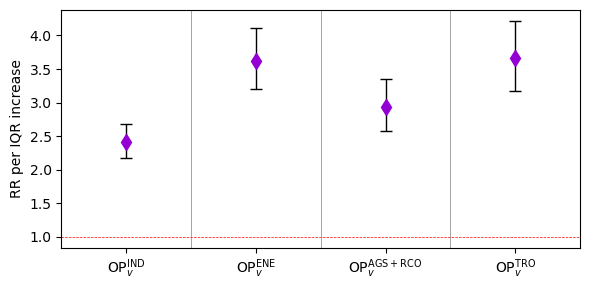

Model for IND_OB:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.2
Date:                Tue, 14 Jan 2025   Deviance:                       668.00
Time:                        14:16:54   Pearson chi2:                     890.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8780
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8361      0.090  

In [18]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# List of independent variables for the new models
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Function to fit GLM model and calculate RR and CI per IQR
def fit_model_and_calculate_rr(var_name, IQR):
    X = data[[var_name]]
    X = sm.add_constant(X)
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    rr, ci_lower, ci_upper = calculate_rr_and_ci(model, var_name, IQR)
    return rr, ci_lower, ci_upper, model

# Calculate IQR for all variables
iqr_values = {var: np.percentile(data[var], 75) - np.percentile(data[var], 25) for var in independent_vars}

# Prepare lists for results
mean_rr = []
lower_bound = []
upper_bound = []
variables = []

# Custom labels for each independent variable
variable_labels = {
    'IND_OB': 'OP$_{v}^{\mathrm{IND}}$',
    'ENE_OB': 'OP$_{v}^{\mathrm{ENE}}$',
    'AGS+RCO_OB': 'OP$_{v}^{\mathrm{AGS+RCO}}$',
    'TRO_OB': 'OP$_{v}^{\mathrm{TRO}}$'
}

# Fit models and store results for each independent variable
for var in independent_vars:
    rr, ci_lower, ci_upper, model = fit_model_and_calculate_rr(var, iqr_values[var])
    mean_rr.append(rr)
    lower_bound.append(ci_lower)
    upper_bound.append(ci_upper)
    variables.append(variable_labels[var])

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_rr, 
             yerr=[np.array(mean_rr) - np.array(lower_bound), 
                   np.array(upper_bound) - np.array(mean_rr)], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('RR per IQR increase')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Insert vertical lines to separate models
plt.axvline(x=0.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 1 and Model 2
plt.axvline(x=1.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 2 and Model 3
plt.axvline(x=2.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 3 and Model 4

# Adjust layout
plt.tight_layout()
#plt.savefig('mortality_sourceOP_reg.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Display the model summaries for review
for var in independent_vars:
     print(f'Model for {var}:')
     X = data[[var]]
     X = sm.add_constant(X)
     model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
     print(model.summary())
     print("\n")

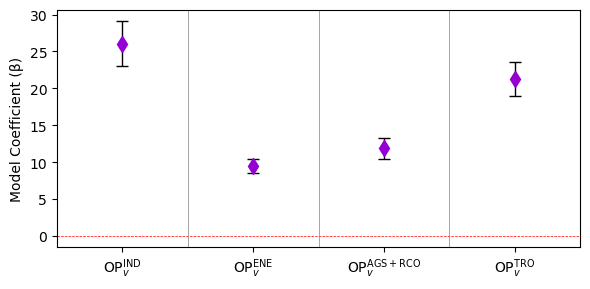

Model for IND_OB:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.2
Date:                Thu, 06 Feb 2025   Deviance:                       668.00
Time:                        14:32:20   Pearson chi2:                     890.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8780
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8361      0.090  

In [5]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# List of independent variables for the new models
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Function to fit GLM model
def fit_model(var_name):
    X = data[[var_name]]
    X = sm.add_constant(X)
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    return model

# Prepare lists for results
coefficients = []
conf_lower = []
conf_upper = []
variables = []

# Custom labels for each independent variable
variable_labels = {
    'IND_OB': 'OP$_{v}^{\mathrm{IND}}$',
    'ENE_OB': 'OP$_{v}^{\mathrm{ENE}}$',
    'AGS+RCO_OB': 'OP$_{v}^{\mathrm{AGS+RCO}}$',
    'TRO_OB': 'OP$_{v}^{\mathrm{TRO}}$'
}

# Fit models and store results for each independent variable
for var in independent_vars:
    model = fit_model(var)
    coef = model.params[var]
    conf_int = model.conf_int().loc[var]
    coefficients.append(coef)
    conf_lower.append(conf_int[0])
    conf_upper.append(conf_int[1])
    variables.append(variable_labels[var])

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, coefficients, 
             yerr=[np.array(coefficients) - np.array(conf_lower), 
                   np.array(conf_upper) - np.array(coefficients)], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('Model Coefficient (β)')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Insert vertical lines to separate models
plt.axvline(x=0.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 1 and Model 2
plt.axvline(x=1.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 2 and Model 3
plt.axvline(x=2.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 3 and Model 4

# Adjust layout
plt.tight_layout()
#plt.savefig('mortality_sourceOP_reg.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Display the model summaries for review
for var in independent_vars:
     print(f'Model for {var}:')
     model = fit_model(var)
     print(model.summary())
     print("\n")

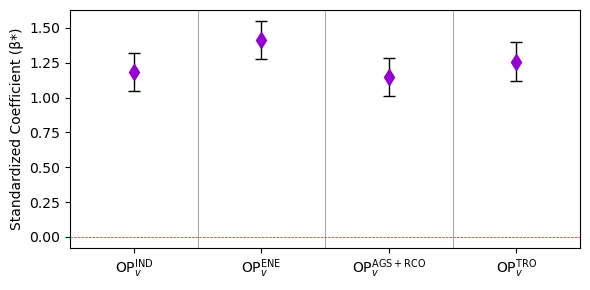

Model for IND_OB:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.2
Date:                Thu, 06 Feb 2025   Deviance:                       668.00
Time:                        15:08:28   Pearson chi2:                     890.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8780
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7941      0.070  

In [11]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# List of independent variables
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Standardize independent variables (Z-score transformation)
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Function to fit GLM model using standardized predictors
def fit_model(var_name):
    X = data_std[[var_name]]  # Use standardized independent variable
    X = sm.add_constant(X)  # Add intercept
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    return model

# Prepare lists for results
coefficients = []
conf_lower = []
conf_upper = []
variables = []

# Custom labels for each independent variable
variable_labels = {
    'IND_OB': 'OP$_{v}^{\mathrm{IND}}$',
    'ENE_OB': 'OP$_{v}^{\mathrm{ENE}}$',
    'AGS+RCO_OB': 'OP$_{v}^{\mathrm{AGS+RCO}}$',
    'TRO_OB': 'OP$_{v}^{\mathrm{TRO}}$'
}

# Fit models and store results for each independent variable
for var in independent_vars:
    model = fit_model(var)
    coef = model.params[var]
    conf_int = model.conf_int().loc[var]
    coefficients.append(coef)
    conf_lower.append(conf_int[0])
    conf_upper.append(conf_int[1])
    variables.append(variable_labels[var])

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, coefficients, 
             yerr=[np.array(coefficients) - np.array(conf_lower), 
                   np.array(conf_upper) - np.array(coefficients)], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('Standardized Coefficient (β*)')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Insert vertical lines to separate models
plt.axvline(x=0.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 1 and Model 2
plt.axvline(x=1.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 2 and Model 3
plt.axvline(x=2.5, color='gray', linestyle='-', linewidth=0.5)  # Between Model 3 and Model 4

# Adjust layout
plt.tight_layout()
#plt.savefig('mortality_sourceOP_reg.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Display the model summaries for review
for var in independent_vars:
    print(f'Model for {var}:')
    model = fit_model(var)
    print(model.summary())
    print("\n")

Table of Relative Risks (RR) and Confidence Intervals (CI) per IQR increase:
                      Variable        RR  CI Lower  CI Upper
0      OP$_{v}^{\mathrm{IND}}$  2.413639  2.178227  2.674493
1      OP$_{v}^{\mathrm{ENE}}$  3.623918  3.196086  4.109021
2  OP$_{v}^{\mathrm{AGS+RCO}}$  2.942032  2.583886  3.349821
3      OP$_{v}^{\mathrm{TRO}}$  3.659732  3.174870  4.218641


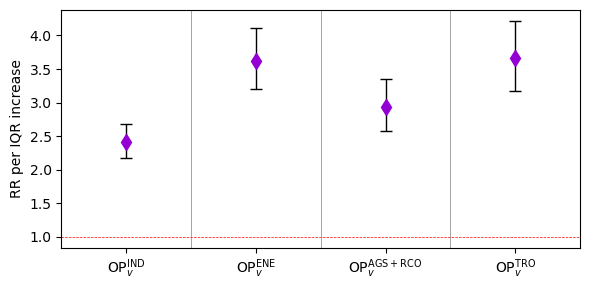

Model for IND_OB:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.2
Date:                Tue, 14 Jan 2025   Deviance:                       668.00
Time:                        14:16:54   Pearson chi2:                     890.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8780
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8361      0.090  

In [19]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# List of independent variables for the new models
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Function to fit GLM model and calculate RR and CI per IQR
def fit_model_and_calculate_rr(var_name, IQR):
    X = data[[var_name]]
    X = sm.add_constant(X)
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    rr, ci_lower, ci_upper = calculate_rr_and_ci(model, var_name, IQR)
    return rr, ci_lower, ci_upper, model

# Function to calculate RR and CI per IQR
def calculate_rr_and_ci(model, var_name, IQR):
    coef = model.params[var_name]
    rr = np.exp(coef * IQR)
    ci_lower = np.exp((model.conf_int().loc[var_name][0]) * IQR)
    ci_upper = np.exp((model.conf_int().loc[var_name][1]) * IQR)
    return rr, ci_lower, ci_upper

# Calculate IQR for all variables
iqr_values = {var: np.percentile(data[var], 75) - np.percentile(data[var], 25) for var in independent_vars}

# Prepare lists for results
mean_rr = []
lower_bound = []
upper_bound = []
variables = []

# Custom labels for each independent variable
variable_labels = {
    'IND_OB': 'OP$_{v}^{\mathrm{IND}}$',
    'ENE_OB': 'OP$_{v}^{\mathrm{ENE}}$',
    'AGS+RCO_OB': 'OP$_{v}^{\mathrm{AGS+RCO}}$',
    'TRO_OB': 'OP$_{v}^{\mathrm{TRO}}$'
}

# Fit models and store results for each independent variable
results = []
for var in independent_vars:
    rr, ci_lower, ci_upper, model = fit_model_and_calculate_rr(var, iqr_values[var])
    results.append({
        'Variable': variable_labels[var],
        'RR': rr,
        'CI Lower': ci_lower,
        'CI Upper': ci_upper
    })
    mean_rr.append(rr)
    lower_bound.append(ci_lower)
    upper_bound.append(ci_upper)
    variables.append(variable_labels[var])

# Convert results to DataFrame and display the table
results_table = pd.DataFrame(results)
print("Table of Relative Risks (RR) and Confidence Intervals (CI) per IQR increase:")
print(results_table)

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_rr, 
             yerr=[np.array(mean_rr) - np.array(lower_bound), 
                   np.array(upper_bound) - np.array(mean_rr)], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('RR per IQR increase')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Insert vertical lines to separate models
plt.axvline(x=0.5, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(x=1.5, color='gray', linestyle='-', linewidth=0.5)
plt.axvline(x=2.5, color='gray', linestyle='-', linewidth=0.5)

# Adjust layout and save plot
plt.tight_layout()
#plt.savefig('mortality_sourceOP_reg.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Display the model summaries for review
for var in independent_vars:
     print(f'Model for {var}:')
     X = data[[var]]
     X = sm.add_constant(X)
     model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
     print(model.summary())
     print("\n")

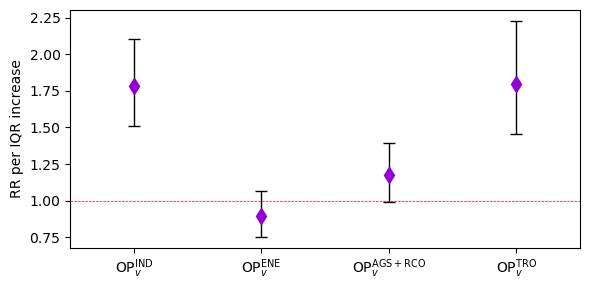

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      198
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.8
Date:                Tue, 14 Jan 2025   Deviance:                       637.25
Time:                        14:16:54   Pearson chi2:                 1.19e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8951
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2371      0.130     55.792      0.0

In [20]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# List of independent variables to include in one model
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Calculate IQR for all variables
iqr_values = {var: np.percentile(data[var], 75) - np.percentile(data[var], 25) for var in independent_vars}

# Prepare X matrix with all independent variables and add constant
X = data[independent_vars]
X = sm.add_constant(X)

# Fit the model with all variables together
model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Function to calculate RR and CI per IQR
def calculate_rr_and_ci(model, var_name, IQR):
    coef = model.params[var_name]
    se = model.bse[var_name]
    rr = np.exp(coef * IQR)
    ci_lower = np.exp((coef - 1.96 * se) * IQR)
    ci_upper = np.exp((coef + 1.96 * se) * IQR)
    return rr, ci_lower, ci_upper

# Extract results for each variable
mean_rr = []
lower_bound = []
upper_bound = []
variables = []

# Custom labels for each independent variable
variable_labels = {
    'IND_OB': 'OP$_{v}^{\mathrm{IND}}$',
    'ENE_OB': 'OP$_{v}^{\mathrm{ENE}}$',
    'AGS+RCO_OB': 'OP$_{v}^{\mathrm{AGS+RCO}}$',
    'TRO_OB': 'OP$_{v}^{\mathrm{TRO}}$'
}

# Calculate RR and CI for each variable in the combined model
for var in independent_vars:
    rr, ci_lower, ci_upper = calculate_rr_and_ci(model, var, iqr_values[var])
    mean_rr.append(rr)
    lower_bound.append(ci_lower)
    upper_bound.append(ci_upper)
    variables.append(variable_labels[var])

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_rr, 
             yerr=[np.array(mean_rr) - np.array(lower_bound), 
                   np.array(upper_bound) - np.array(mean_rr)], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=1, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('RR per IQR increase')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Display the model summary for review
print(model.summary())

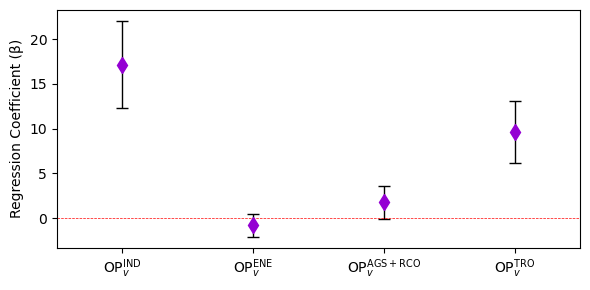

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      198
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.8
Date:                Thu, 06 Feb 2025   Deviance:                       637.25
Time:                        14:38:30   Pearson chi2:                 1.19e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8951
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2371      0.130     55.792      0.0

In [8]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF)
y = data['GBD2019_CRF']

# List of independent variables to include in one model
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Prepare X matrix with all independent variables and add constant
X = data[independent_vars]
X = sm.add_constant(X)

# Fit the model with all variables together
model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Extract coefficients and confidence intervals
coefficients = model.params[independent_vars]
conf_int = model.conf_int().loc[independent_vars]

# Prepare lists for plotting
mean_coef = coefficients.values
lower_bound = conf_int[0].values
upper_bound = conf_int[1].values
variables = [
    'OP$_{v}^{\mathrm{IND}}$', 
    'OP$_{v}^{\mathrm{ENE}}$', 
    'OP$_{v}^{\mathrm{AGS+RCO}}$', 
    'OP$_{v}^{\mathrm{TRO}}$'
]

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_coef, 
             yerr=[mean_coef - lower_bound, 
                   upper_bound - mean_coef], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('Regression Coefficient (β)')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Display the model summary for review
print(model.summary())

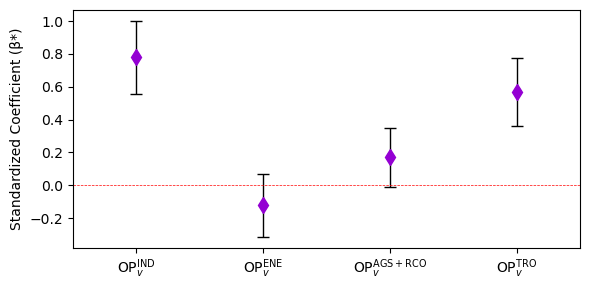

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      198
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.8
Date:                Thu, 06 Feb 2025   Deviance:                       637.25
Time:                        15:11:31   Pearson chi2:                 1.19e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.8951
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7183      0.070    124.202      0.0

In [12]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# List of independent variables
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Standardize independent variables (Z-score transformation)
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Prepare X matrix with standardized independent variables and add constant
X_std = sm.add_constant(data_std)

# Fit the model with all variables together
model = sm.GLM(y, X_std, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Extract standardized coefficients and confidence intervals
coefficients = model.params[independent_vars]
conf_int = model.conf_int().loc[independent_vars]

# Prepare lists for plotting
mean_coef = coefficients.values
lower_bound = conf_int[0].values
upper_bound = conf_int[1].values
variables = [
    'OP$_{v}^{\mathrm{IND}}$', 
    'OP$_{v}^{\mathrm{ENE}}$', 
    'OP$_{v}^{\mathrm{AGS+RCO}}$', 
    'OP$_{v}^{\mathrm{TRO}}$'
]

# Plot the results in a forest plot
plt.figure(figsize=(6, 3))
plt.errorbar(variables, mean_coef, 
             yerr=[mean_coef - lower_bound, 
                   upper_bound - mean_coef], 
             fmt='d', color='darkviolet', ecolor='black', elinewidth=1, capsize=4, markersize=8)
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.5)
plt.ylabel('Coefficient estimate')

# Adjust x-axis limits to add padding around first and last points
plt.xlim(-0.5, len(variables) - 0.5)

# Adjust layout
plt.tight_layout()
plt.show()

# Display the model summary for review
print(model.summary())

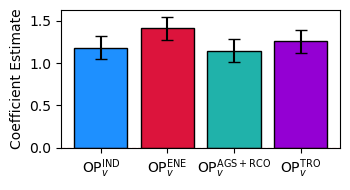

Model for IND_OB:
                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      201
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.2
Date:                Mon, 10 Feb 2025   Deviance:                       668.00
Time:                        15:46:34   Pearson chi2:                     890.
No. Iterations:                    19   Pseudo R-squ. (CS):             0.8780
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7941      0.070  

In [102]:
# Load required libraries
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# List of independent variables
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Standardize independent variables (Z-score transformation)
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Function to fit GLM model using standardized predictors
def fit_model(var_name):
    X = data_std[[var_name]]  # Use standardized independent variable
    X = sm.add_constant(X)  # Add intercept
    model = sm.GLM(y, X, family=sm.families.NegativeBinomial(alpha=1.0)).fit()
    return model

# Prepare lists for results
coefficients = []
conf_lower = []
conf_upper = []
variables = []

# Custom labels for each independent variable
variable_labels = {
    'IND_OB': 'OP$_{v}^{\mathrm{IND}}$',
    'ENE_OB': 'OP$_{v}^{\mathrm{ENE}}$',
    'AGS+RCO_OB': 'OP$_{v}^{\mathrm{AGS+RCO}}$',
    'TRO_OB': 'OP$_{v}^{\mathrm{TRO}}$'
}

# Fit models and store results for each independent variable
for var in independent_vars:
    model = fit_model(var)
    coef = model.params[var]
    conf_int = model.conf_int().loc[var]
    coefficients.append(coef)
    conf_lower.append(conf_int[0])
    conf_upper.append(conf_int[1])
    variables.append(variable_labels[var])

# Define custom colors for each bar
colors = ['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet']

# Create bar plot
plt.figure(figsize=(3.6, 2))
bars = plt.bar(variables, coefficients, color=colors, edgecolor='black', 
               yerr=[np.array(coefficients) - np.array(conf_lower), 
                     np.array(conf_upper) - np.array(coefficients)], capsize=4)

# Add horizontal line at zero
plt.axhline(y=0, color='red', linestyle='--', linewidth=0.8)

# Set y-axis ticks manually
plt.yticks([0, 0.5, 1.0, 1.50])

# Label axes
plt.ylabel('Coefficient Estimate')

# Adjust layout
plt.tight_layout()
plt.savefig('coefficient2.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Display the model summaries for review
for var in independent_vars:
    print(f'Model for {var}:')
    model = fit_model(var)
    print(model.summary())
    print("\n")

In [104]:
data_std.to_csv("data_std2.csv")

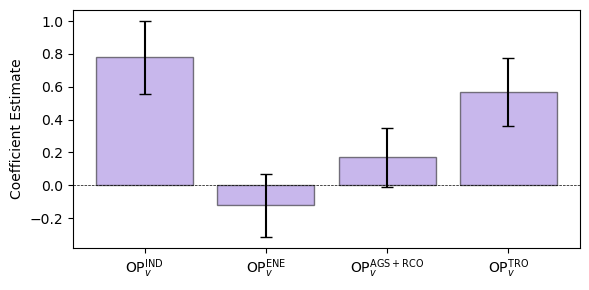

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      198
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.8
Date:                Fri, 07 Feb 2025   Deviance:                       637.25
Time:                        02:04:16   Pearson chi2:                 1.19e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.8951
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7183      0.070    124.202      0.0

In [37]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# List of independent variables
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Standardize independent variables (Z-score transformation)
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Prepare X matrix with standardized independent variables and add constant
X_std = sm.add_constant(data_std)

# Fit the model with all variables together
model = sm.GLM(y, X_std, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Extract standardized coefficients and confidence intervals
coefficients = model.params[independent_vars]
conf_int = model.conf_int().loc[independent_vars]

# Prepare lists for plotting
mean_coef = coefficients.values
lower_bound = conf_int[0].values
upper_bound = conf_int[1].values
variables = ['OP$_{v}^{\mathrm{IND}}$', 'OP$_{v}^{\mathrm{ENE}}$', 'OP$_{v}^{\mathrm{AGS+RCO}}$', 'OP$_{v}^{\mathrm{TRO}}$']

# Define shades of purple for bars
shades_of_purple = [mcolors.to_rgba('mediumpurple', alpha) for alpha in [0.4, 0.6, 0.8, 1.0]]

# Plot the results using bars
plt.figure(figsize=(6, 3))
plt.bar(variables, mean_coef, yerr=[mean_coef - lower_bound, upper_bound - mean_coef],
        color=shades_of_purple, edgecolor='black', capsize=4, alpha=.5)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.5)
plt.ylabel('Coefficient Estimate')

# Adjust layout
plt.tight_layout()
plt.show()

# Display the model summary for review
print(model.summary())

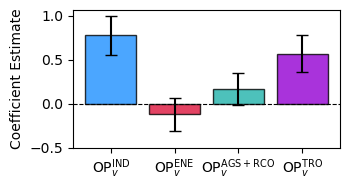

                 Generalized Linear Model Regression Results                  
Dep. Variable:            GBD2019_CRF   No. Observations:                  203
Model:                            GLM   Df Residuals:                      198
Model Family:        NegativeBinomial   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1972.8
Date:                Sun, 09 Feb 2025   Deviance:                       637.25
Time:                        18:02:59   Pearson chi2:                 1.19e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.8951
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7183      0.070    124.202      0.0

In [89]:
import pandas as pd
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

# Load your data (assuming it's in CSV format)
data = pd.read_csv('country_OP.csv')

# Define dependent variable (GBD2019_CRF) in original units
y = data['GBD2019_CRF']

# List of independent variables
independent_vars = ['IND_OB', 'ENE_OB', 'AGS+RCO_OB', 'TRO_OB']

# Standardize independent variables (Z-score transformation)
data_std = data[independent_vars].apply(lambda x: (x - x.mean()) / x.std())

# Prepare X matrix with standardized independent variables and add constant
X_std = sm.add_constant(data_std)

# Fit the model with all variables together
model = sm.GLM(y, X_std, family=sm.families.NegativeBinomial(alpha=1.0)).fit()

# Extract standardized coefficients and confidence intervals
coefficients = model.params[independent_vars]
conf_int = model.conf_int().loc[independent_vars]

# Prepare lists for plotting
mean_coef = coefficients.values
lower_bound = conf_int[0].values
upper_bound = conf_int[1].values
variables = ['OP$_{v}^{\mathrm{IND}}$', 'OP$_{v}^{\mathrm{ENE}}$', 'OP$_{v}^{\mathrm{AGS+RCO}}$', 'OP$_{v}^{\mathrm{TRO}}$']

# Define custom colors for bars
colors = ['dodgerblue', 'crimson', 'lightseagreen', 'darkviolet']

# Plot the results using bars
plt.figure(figsize=(3.6, 2))
plt.bar(variables, mean_coef, yerr=[mean_coef - lower_bound, upper_bound - mean_coef],
        color=colors, edgecolor='black', capsize=4, alpha=0.8)

# Add horizontal line at zero
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)

# Set y-axis ticks manually
plt.yticks([-0.5, 0, 0.5, 1.0])

# Label y-axis
plt.ylabel('Coefficient Estimate')

# Adjust layout
plt.tight_layout()
plt.savefig('coefficient3.tif', bbox_inches='tight', dpi=1200, transparent=True)
plt.show()

# Display the model summary for review
print(model.summary())

In [25]:
print (IQR_PM25) 
print (IQR_PM25_CRF)
print (IQR_Source)

20.4
0.51
0.27802636999999997
